# HAI Security Dataset Analysis

This notebook analyzes the HIL-based Augmented ICS (HAI) Security Dataset, which contains data collected from a realistic industrial control system (ICS) testbed augmented with a hardware-in-the-loop (HIL) simulator that emulates steam-turbine power generation and pumped-storage hydropower generation.

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
from datetime import datetime

# Set plot style
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Dataset Overview

The HAI security dataset includes multiple versions (HAI-20.07, HAI-21.03, HAI-22.04, HAI-23.05, HAIEnd-23.05), each containing normal and abnormal behaviors for ICS anomaly detection research. Let's first explore the available datasets.

In [19]:
# List all available dataset versions
dataset_versions = glob('../hai-security-dataset/hai-*')
dataset_versions.extend(glob('../hai-security-dataset/haiend-*'))
dataset_versions = [os.path.basename(version) for version in dataset_versions]
print(f"Available dataset versions: {dataset_versions}")

Available dataset versions: ['hai-21.03', 'hai-20.07', 'hai-22.04', 'hai-23.05', 'haiend-23.05']


## 2. Exploring HAI-22.04 Dataset

Let's start by exploring the HAI-22.04 dataset, which includes training and testing datasets.

In [21]:
# List all files in HAI-22.04
hai_22_04_files = glob('../hai-security-dataset/hai-22.04/*.csv')
hai_22_04_files = [os.path.basename(file) for file in hai_22_04_files]
print(f"Files in HAI-22.04: {hai_22_04_files}")

Files in HAI-22.04: ['train6.csv', 'train5.csv', 'train4.csv', 'train3.csv', 'train2.csv', 'train1.csv', 'test4.csv', 'test3.csv', 'test2.csv', 'test1.csv']


In [23]:
# Load one training dataset to explore its structure
train1_path = '../hai-security-dataset/hai-22.04/train1.csv'
train1_df = pd.read_csv(train1_path)

# Display basic information
print(f"Shape of train1.csv: {train1_df.shape}")
print("\nFirst 5 rows:")
train1_df.head()

Shape of train1.csv: (93601, 88)

First 5 rows:


timestamp  P1_B2004  P1_B2016   P1_B3004    P1_B3005  P1_B4002  \
0  2021-07-11 10:00:00   0.08771   0.88504  476.76703  1014.79321  26.92264   
1  2021-07-11 10:00:01   0.08771   0.88619  476.76703  1014.79321  26.92264   
2  2021-07-11 10:00:02   0.08771   0.88836  476.76703  1014.79321  26.92264   
3  2021-07-11 10:00:03   0.08771   0.89214  476.76703  1014.79321  26.92264   
4  2021-07-11 10:00:04   0.08771   0.89191  476.76703  1014.79321  26.92264   

   P1_B4005   P1_B400B  P1_B4022  P1_FCV01D  ...  P4_HT_PS      P4_LD  \
0  15.07713  595.06104  30.08042   15.50464  ...   7.08818  276.40338   
1  14.97197  531.50317  30.08423   16.20023  ...   7.08818  276.18634   
2  14.90129  451.06253  30.09148   16.53352  ...   7.08818  279.85754   
3  14.82246  404.38739  30.10407   16.30247  ...   7.08818  281.50317   
4  14.73087  382.53925  30.10331   15.79237  ...   7.08818  281.34039   

   P4_ST_FD  P4_ST_GOV   P4_ST_LD   P4_ST_PO  P4_ST_PS  P4_ST_PT01  \
0  -0.00087      14742  276.45758  267.90363   8.90254        9914   
1   0.00058      14781  278.91705  268.95258   8.90254        9914   
2  -0.00072      14831  278.89899  269.76636   8.90254        9914   
3   0.00101      14917  280.49048  271.64716   8.90254        9914   
4   0.00043      14997  283.47437  272.80457   8.90254        9914   

   P4_ST_TT01  Attack  
0       27170       0  
1       27171       0  
2       27170       0  
3       27171       0  
4       27171       0  

[5 rows x 88 columns]

In [24]:
# Check column names
print(f"Number of columns: {len(train1_df.columns)}")
print("\nColumn names:")
train1_df.columns.tolist()

Number of columns: 88

Column names:


['timestamp',
 'P1_B2004',
 'P1_B2016',
 'P1_B3004',
 'P1_B3005',
 'P1_B4002',
 'P1_B4005',
 'P1_B400B',
 'P1_B4022',
 'P1_FCV01D',
 'P1_FCV01Z',
 'P1_FCV02D',
 'P1_FCV02Z',
 'P1_FCV03D',
 'P1_FCV03Z',
 'P1_FT01',
 'P1_FT01Z',
 'P1_FT02',
 'P1_FT02Z',
 'P1_FT03',
 'P1_FT03Z',
 'P1_LCV01D',
 'P1_LCV01Z',
 'P1_LIT01',
 'P1_PCV01D',
 'P1_PCV01Z',
 'P1_PCV02D',
 'P1_PCV02Z',
 'P1_PIT01',
 'P1_PIT01_HH',
 'P1_PIT02',
 'P1_PP01AD',
 'P1_PP01AR',
 'P1_PP01BD',
 'P1_PP01BR',
 'P1_PP02D',
 'P1_PP02R',
 'P1_PP04',
 'P1_PP04SP',
 'P1_SOL01D',
 'P1_SOL03D',
 'P1_STSP',
 'P1_TIT01',
 'P1_TIT02',
 'P1_TIT03',
 'P2_24Vdc',
 'P2_ATSW_Lamp',
 'P2_AutoGO',
 'P2_AutoSD',
 'P2_Emerg',
 'P2_MASW',
 'P2_MASW_Lamp',
 'P2_ManualGO',
 'P2_ManualSD',
 'P2_OnOff',
 'P2_RTR',
 'P2_SCO',
 'P2_SCST',
 'P2_SIT01',
 'P2_TripEx',
 'P2_VIBTR01',
 'P2_VIBTR02',
 'P2_VIBTR03',
 'P2_VIBTR04',
 'P2_VT01',
 'P2_VTR01',
 'P2_VTR02',
 'P2_VTR03',
 'P2_VTR04',
 'P3_FIT01',
 'P3_LCP01D',
 'P3_LCV01D',
 'P3_LH01',
 'P3_LIT01',
 

In [25]:
# Check data types and missing values
train1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93601 entries, 0 to 93600
Data columns (total 88 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     93601 non-null  object 
 1   P1_B2004      93601 non-null  float64
 2   P1_B2016      93601 non-null  float64
 3   P1_B3004      93601 non-null  float64
 4   P1_B3005      93601 non-null  float64
 5   P1_B4002      93601 non-null  float64
 6   P1_B4005      93601 non-null  float64
 7   P1_B400B      93601 non-null  float64
 8   P1_B4022      93601 non-null  float64
 9   P1_FCV01D     93601 non-null  float64
 10  P1_FCV01Z     93601 non-null  float64
 11  P1_FCV02D     93601 non-null  float64
 12  P1_FCV02Z     93601 non-null  float64
 13  P1_FCV03D     93601 non-null  float64
 14  P1_FCV03Z     93601 non-null  float64
 15  P1_FT01       93601 non-null  float64
 16  P1_FT01Z      93601 non-null  float64
 17  P1_FT02       93601 non-null  float64
 18  P1_FT02Z      93601 non-nu

In [26]:
# Convert timestamp to datetime
if 'timestamp' in train1_df.columns:
    train1_df['timestamp'] = pd.to_datetime(train1_df['timestamp'])
    
# Check time range
print(f"Start time: {train1_df['timestamp'].min()}")
print(f"End time: {train1_df['timestamp'].max()}")
print(f"Duration: {train1_df['timestamp'].max() - train1_df['timestamp'].min()}")

Start time: 2021-07-11 10:00:00
End time: 2021-07-12 12:00:00
Duration: 1 days 02:00:00


## 3. Analyzing Attack Labels

Let's check if the dataset contains attack labels and analyze their distribution.

Attack label columns: ['Attack']
Attack: 0 attacks (0.00% of data)


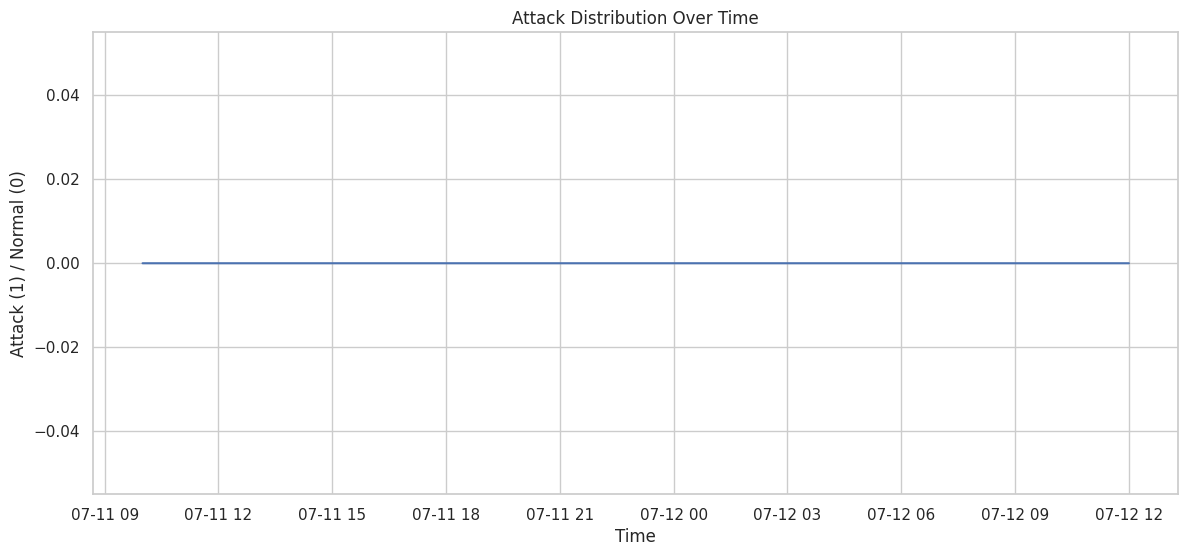

In [27]:
# Check if attack labels are present
attack_columns = [col for col in train1_df.columns if 'attack' in col.lower()]
print(f"Attack label columns: {attack_columns}")

if attack_columns:
    # Count attack instances
    for col in attack_columns:
        attack_count = train1_df[col].sum()
        attack_percentage = (attack_count / len(train1_df)) * 100
        print(f"{col}: {attack_count} attacks ({attack_percentage:.2f}% of data)")
        
    # Plot attack distribution over time for the first attack column
    plt.figure(figsize=(14, 6))
    plt.plot(train1_df['timestamp'], train1_df[attack_columns[0]])
    plt.title(f'{attack_columns[0]} Distribution Over Time')
    plt.xlabel('Time')
    plt.ylabel('Attack (1) / Normal (0)')
    plt.show()

## 4. Exploring Data Points

Based on the technical details, the dataset contains various data points related to different controllers (P1-PC, P1-LC, P1-FC, P1-TC, P2-SC, P3-LC). Let's explore some key data points.

In [28]:
# Group data points by controller
controller_prefixes = ['P1_', 'P2_', 'P3_', 'P4_']
for prefix in controller_prefixes:
    cols = [col for col in train1_df.columns if col.startswith(prefix)]
    print(f"\n{prefix} data points ({len(cols)}): {cols[:5]}...")


P1_ data points (44): ['P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002']...

P2_ data points (24): ['P2_24Vdc', 'P2_ATSW_Lamp', 'P2_AutoGO', 'P2_AutoSD', 'P2_Emerg']...

P3_ data points (7): ['P3_FIT01', 'P3_LCP01D', 'P3_LCV01D', 'P3_LH01', 'P3_LIT01']...

P4_ data points (11): ['P4_HT_FD', 'P4_HT_PO', 'P4_HT_PS', 'P4_LD', 'P4_ST_FD']...


In [29]:
# Select key data points for visualization
key_points = [
    'P1_B2016',  # Pressure demand for thermal power output control
    'P1_PIT01',  # Heat-exchanger outlet pressure
    'P1_B3004',  # Water level setpoint (return water tank)
    'P1_LIT01',  # Water level of the return water tank
    'P1_B3005',  # Discharge flowrate setpoint (return water tank)
    'P1_FT03',   # Measured flowrate of the return water tank
    'P1_B4022',  # Temperature demand for thermal power output control
    'P1_TIT01'   # Heat-exchanger outlet temperature
]

# Check if these columns exist in the dataset
existing_key_points = [col for col in key_points if col in train1_df.columns]
print(f"Available key points: {existing_key_points}")

Available key points: ['P1_B2016', 'P1_PIT01', 'P1_B3004', 'P1_LIT01', 'P1_B3005', 'P1_FT03', 'P1_B4022', 'P1_TIT01']


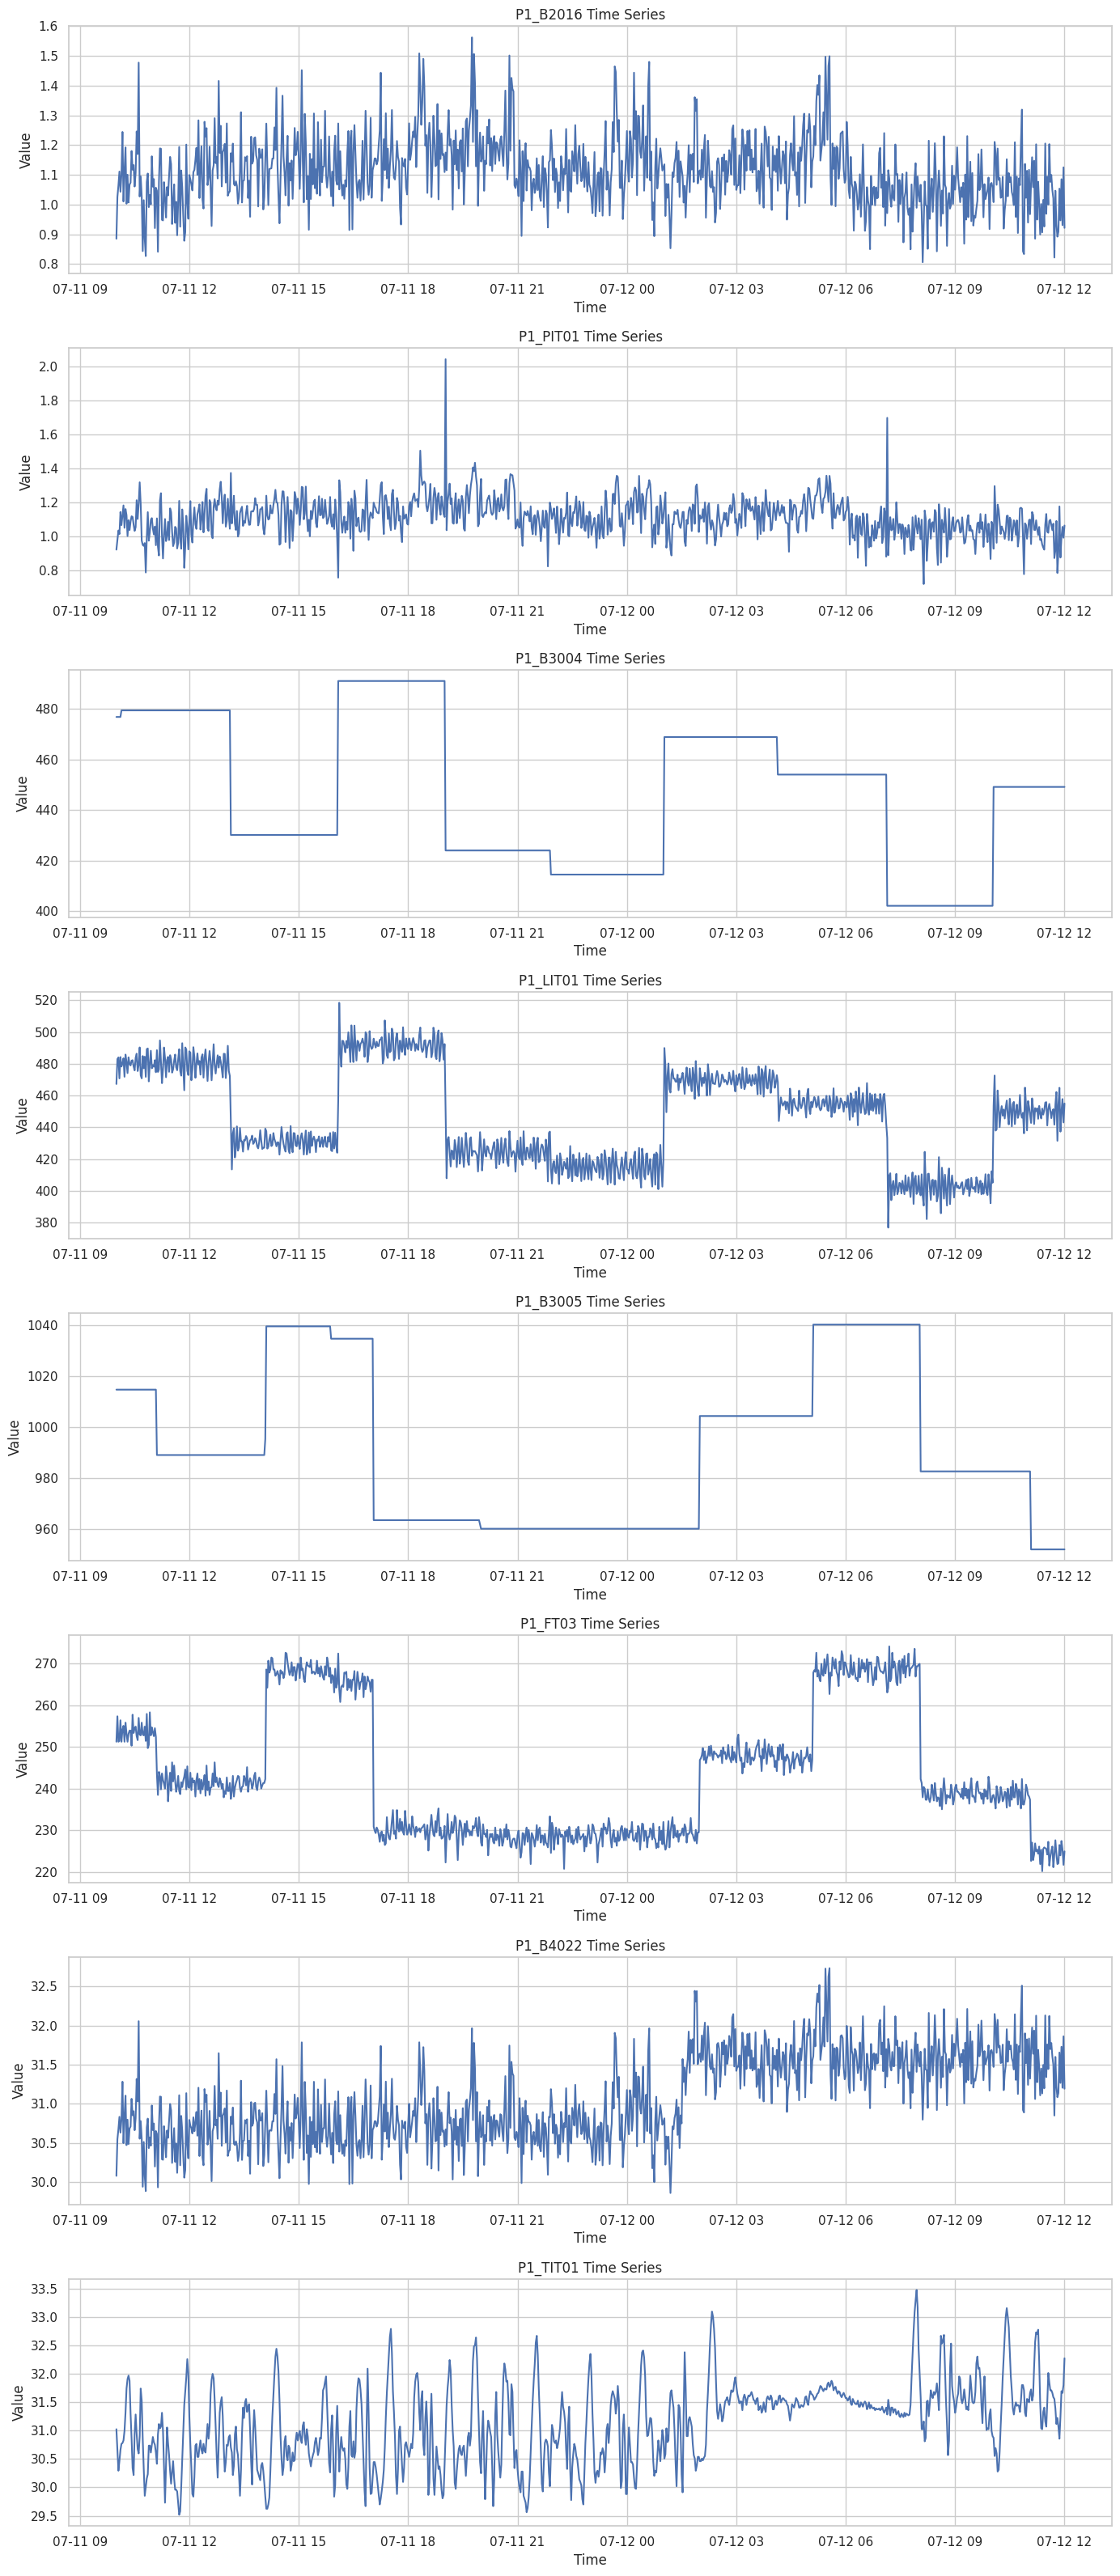

In [30]:
# Plot time series for key data points
if existing_key_points:
    # Sample data to reduce plotting time (every 100th point)
    sampled_df = train1_df.iloc[::100].copy()
    
    # Plot each key point
    fig, axes = plt.subplots(len(existing_key_points), 1, figsize=(14, 4*len(existing_key_points)))
    
    for i, point in enumerate(existing_key_points):
        axes[i].plot(sampled_df['timestamp'], sampled_df[point])
        axes[i].set_title(f'{point} Time Series')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Value')
    
    plt.tight_layout()
    plt.show()

## 5. Correlation Analysis

Let's analyze correlations between different data points to understand their relationships.

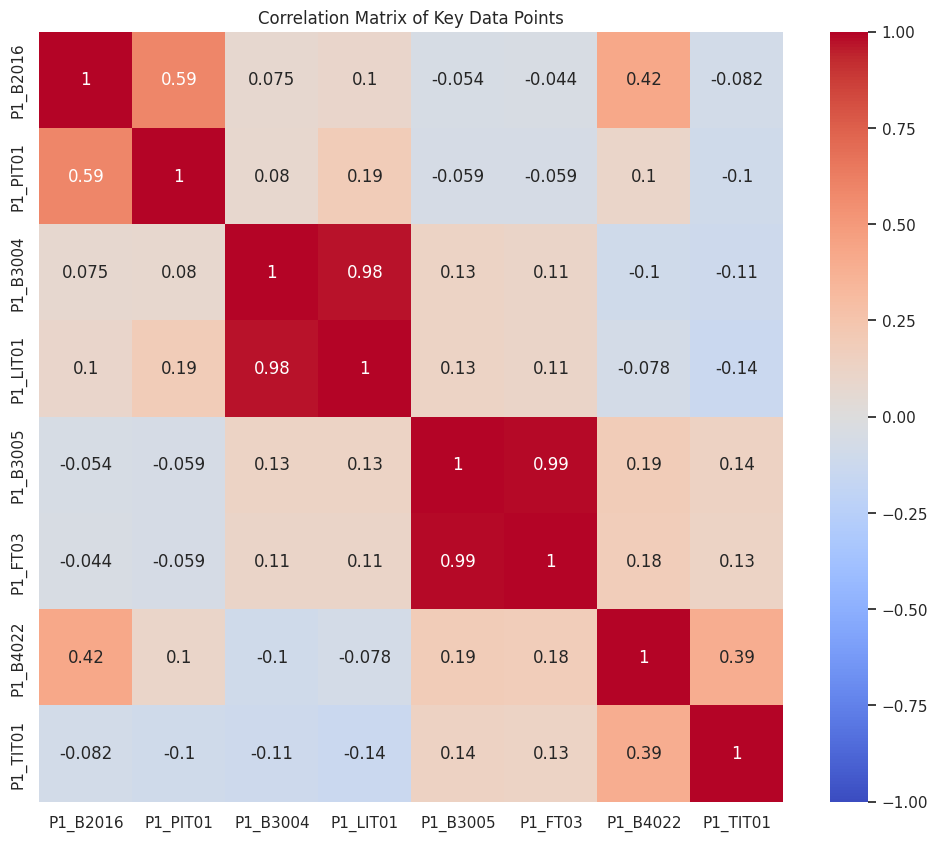

In [31]:
# Select a subset of columns for correlation analysis
if existing_key_points:
    # Calculate correlation matrix
    corr_matrix = train1_df[existing_key_points].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Key Data Points')
    plt.show()

## 6. Comparing Multiple Datasets

Let's compare key statistics across different training datasets.

In [33]:
# List all training datasets
train_files = [f for f in hai_22_04_files if f.startswith('train')]
print(f"Training datasets: {train_files}")

# Function to get basic statistics for a dataset
def get_dataset_stats(file_name):
    file_path = f'../hai-security-dataset/hai-22.04/{file_name}'
    df = pd.read_csv(file_path)
    
    # Convert timestamp if it exists
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Get attack information if available
    attack_cols = [col for col in df.columns if 'attack' in col.lower()]
    attack_info = {}
    for col in attack_cols:
        attack_info[col] = df[col].sum()
    
    return {
        'file_name': file_name,
        'rows': len(df),
        'columns': len(df.columns),
        'start_time': df['timestamp'].min() if 'timestamp' in df.columns else None,
        'end_time': df['timestamp'].max() if 'timestamp' in df.columns else None,
        'duration': df['timestamp'].max() - df['timestamp'].min() if 'timestamp' in df.columns else None,
        'attack_info': attack_info
    }

# Get statistics for all training datasets
train_stats = []
for file in train_files:
    try:
        stats = get_dataset_stats(file)
        train_stats.append(stats)
        print(f"Processed {file}")
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Display statistics in a table
stats_df = pd.DataFrame(train_stats)
stats_df

Training datasets: ['train6.csv', 'train5.csv', 'train4.csv', 'train3.csv', 'train2.csv', 'train1.csv']
Processed train6.csv
Processed train5.csv
Processed train4.csv
Processed train3.csv
Processed train2.csv
Processed train1.csv


file_name    rows  columns          start_time            end_time  \
0  train6.csv  259200       88 2021-08-06 09:00:01 2021-08-09 09:00:00   
1  train5.csv  237600       88 2021-08-02 15:00:01 2021-08-05 09:00:00   
2  train4.csv   86401       88 2021-07-26 12:00:00 2021-07-27 12:00:00   
3  train3.csv  126000       88 2021-07-23 18:00:01 2021-07-25 05:00:00   
4  train2.csv  201600       88 2021-07-17 00:00:01 2021-07-19 08:00:00   
5  train1.csv   93601       88 2021-07-11 10:00:00 2021-07-12 12:00:00   

         duration    attack_info  
0 2 days 23:59:59  {'Attack': 0}  
1 2 days 17:59:59  {'Attack': 0}  
2 1 days 00:00:00  {'Attack': 0}  
3 1 days 10:59:59  {'Attack': 0}  
4 2 days 07:59:59  {'Attack': 0}  
5 1 days 02:00:00  {'Attack': 0}

## 7. Analyzing Test Datasets

Let's also analyze the test datasets to understand their characteristics.

In [34]:
# List all test datasets
test_files = [f for f in hai_22_04_files if f.startswith('test')]
print(f"Test datasets: {test_files}")

# Get statistics for all test datasets
test_stats = []
for file in test_files:
    try:
        stats = get_dataset_stats(file)
        test_stats.append(stats)
        print(f"Processed {file}")
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Display statistics in a table
test_stats_df = pd.DataFrame(test_stats)
test_stats_df

Test datasets: ['test4.csv', 'test3.csv', 'test2.csv', 'test1.csv']
Processed test4.csv
Processed test3.csv
Processed test2.csv
Processed test1.csv


file_name    rows  columns          start_time            end_time  \
0  test4.csv  129600       88 2021-07-15 12:00:01 2021-07-17 00:00:00   
1  test3.csv   62400       88 2021-07-14 17:40:01 2021-07-15 11:00:00   
2  test2.csv   82800       88 2021-07-13 16:00:01 2021-07-14 15:00:00   
3  test1.csv   86400       88 2021-07-10 00:00:01 2021-07-11 00:00:00   

         duration       attack_info  
0 1 days 11:59:59  {'Attack': 4423}  
1 0 days 17:19:59  {'Attack': 3841}  
2 0 days 22:59:59  {'Attack': 2881}  
3 0 days 23:59:59   {'Attack': 885}

## 8. Visualizing Attack Scenarios

Let's visualize some attack scenarios in the test datasets to understand their patterns.

Attack columns in test4.csv: ['Attack']
Found 24 attack periods


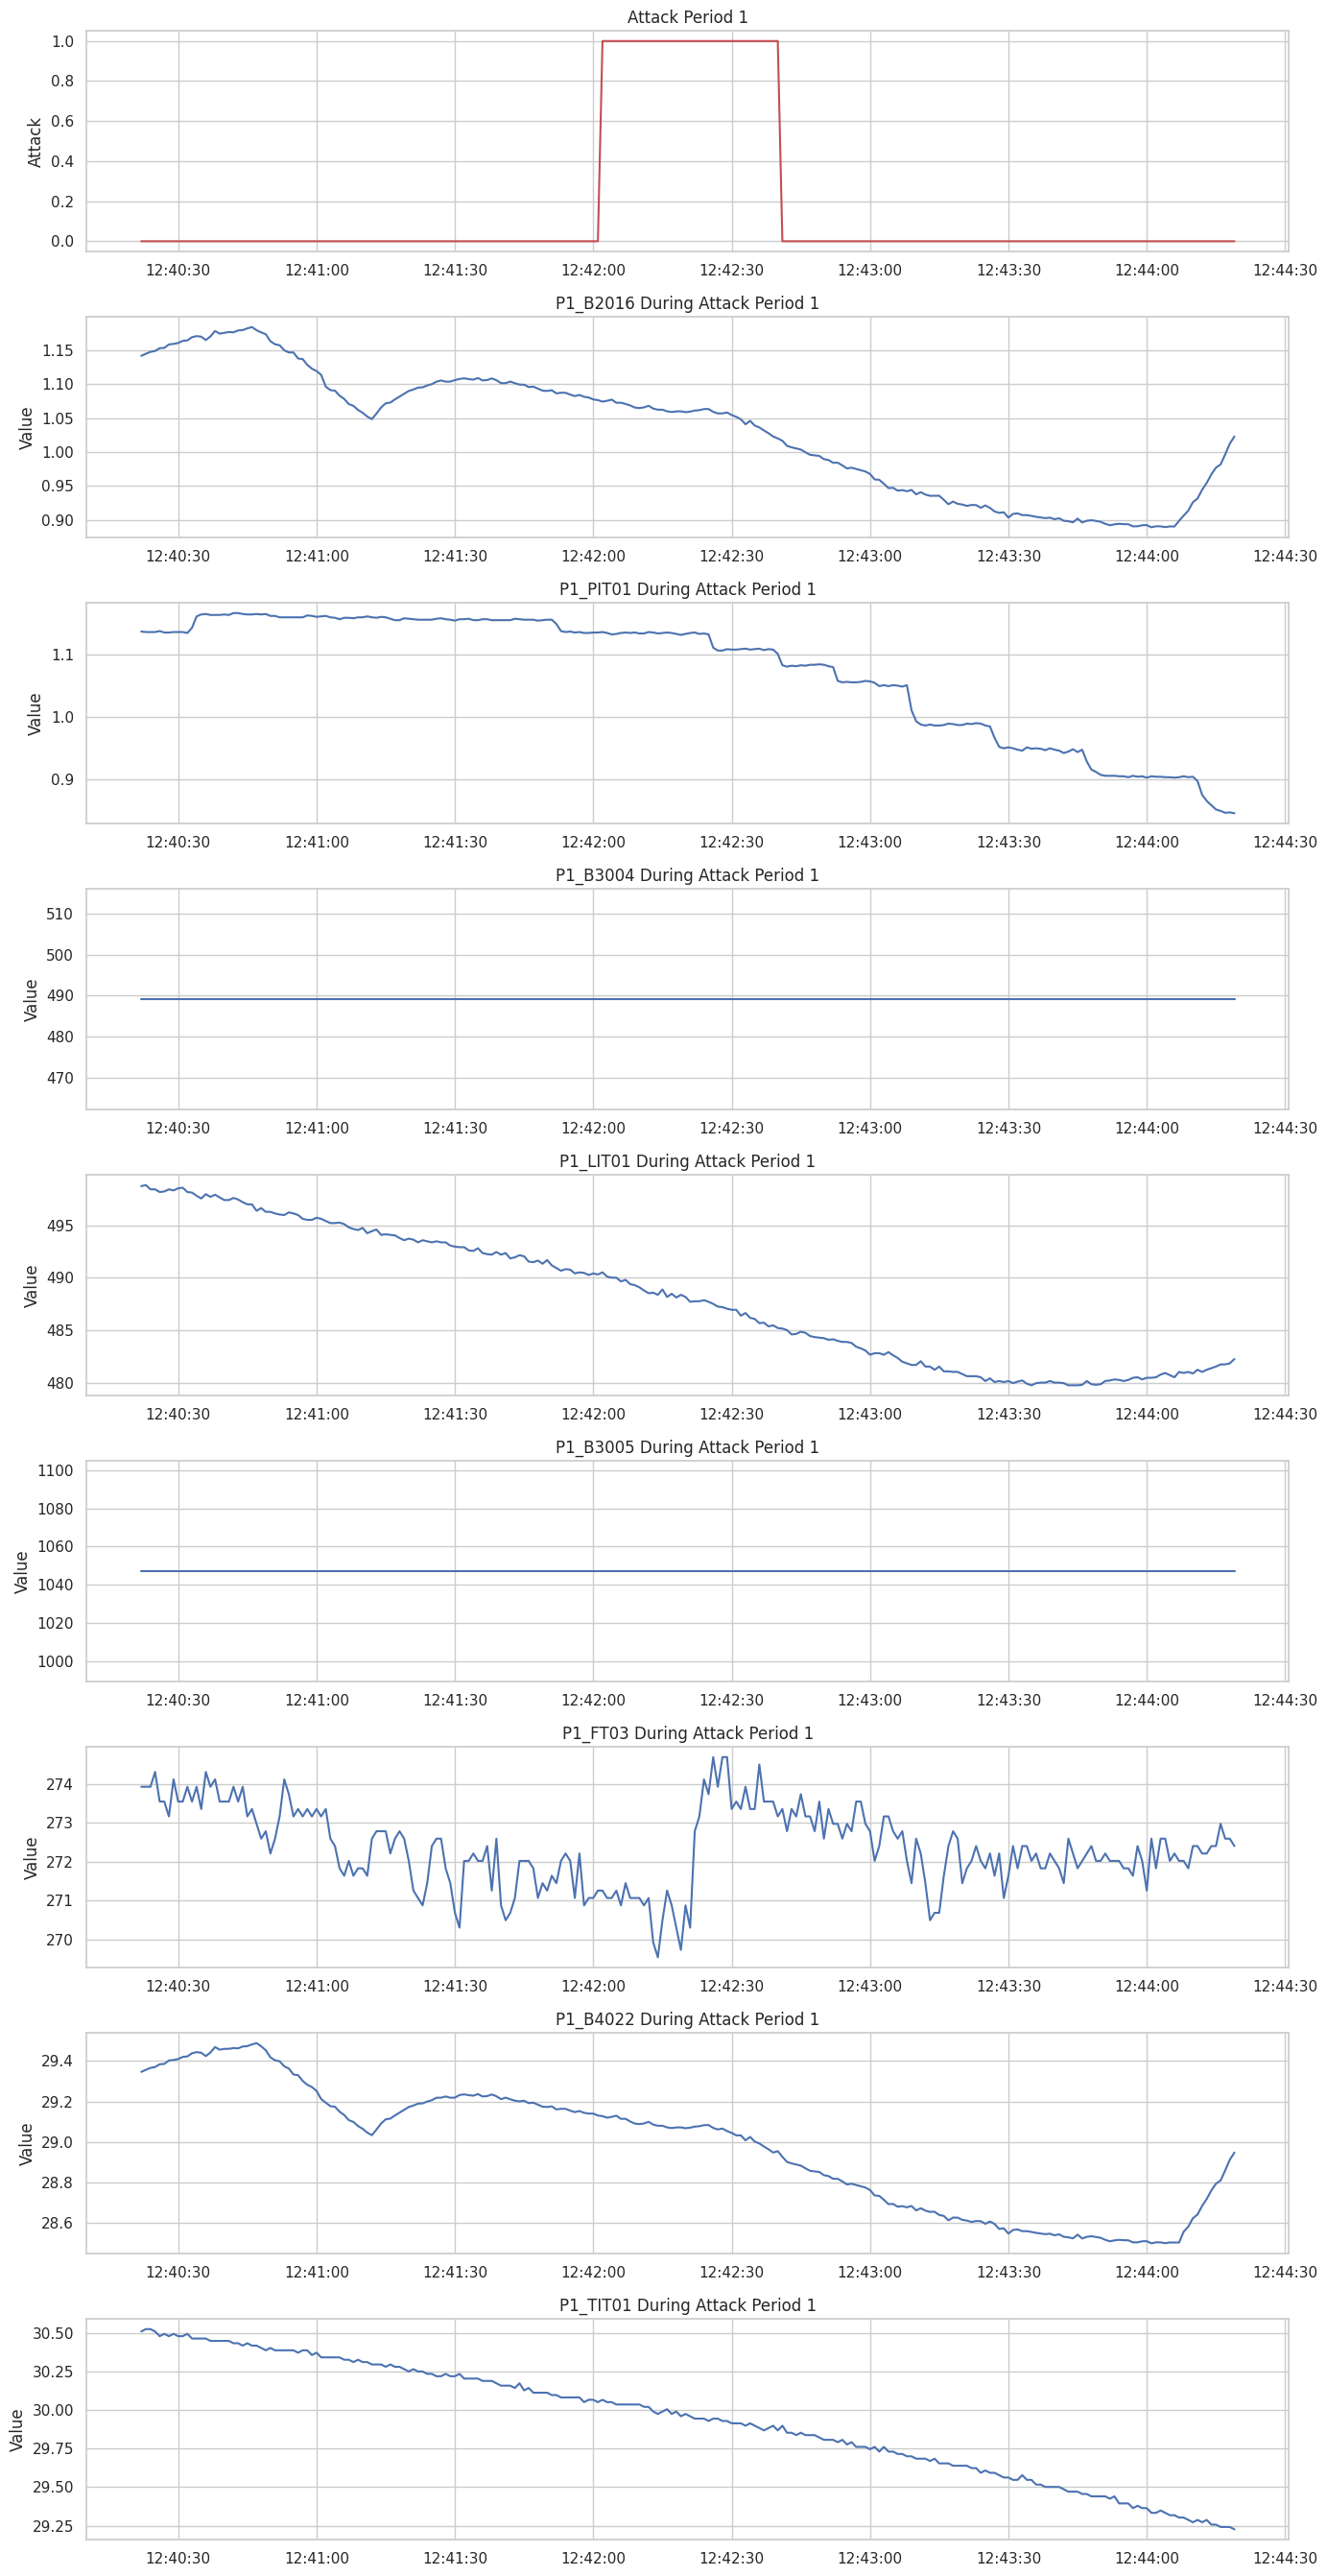

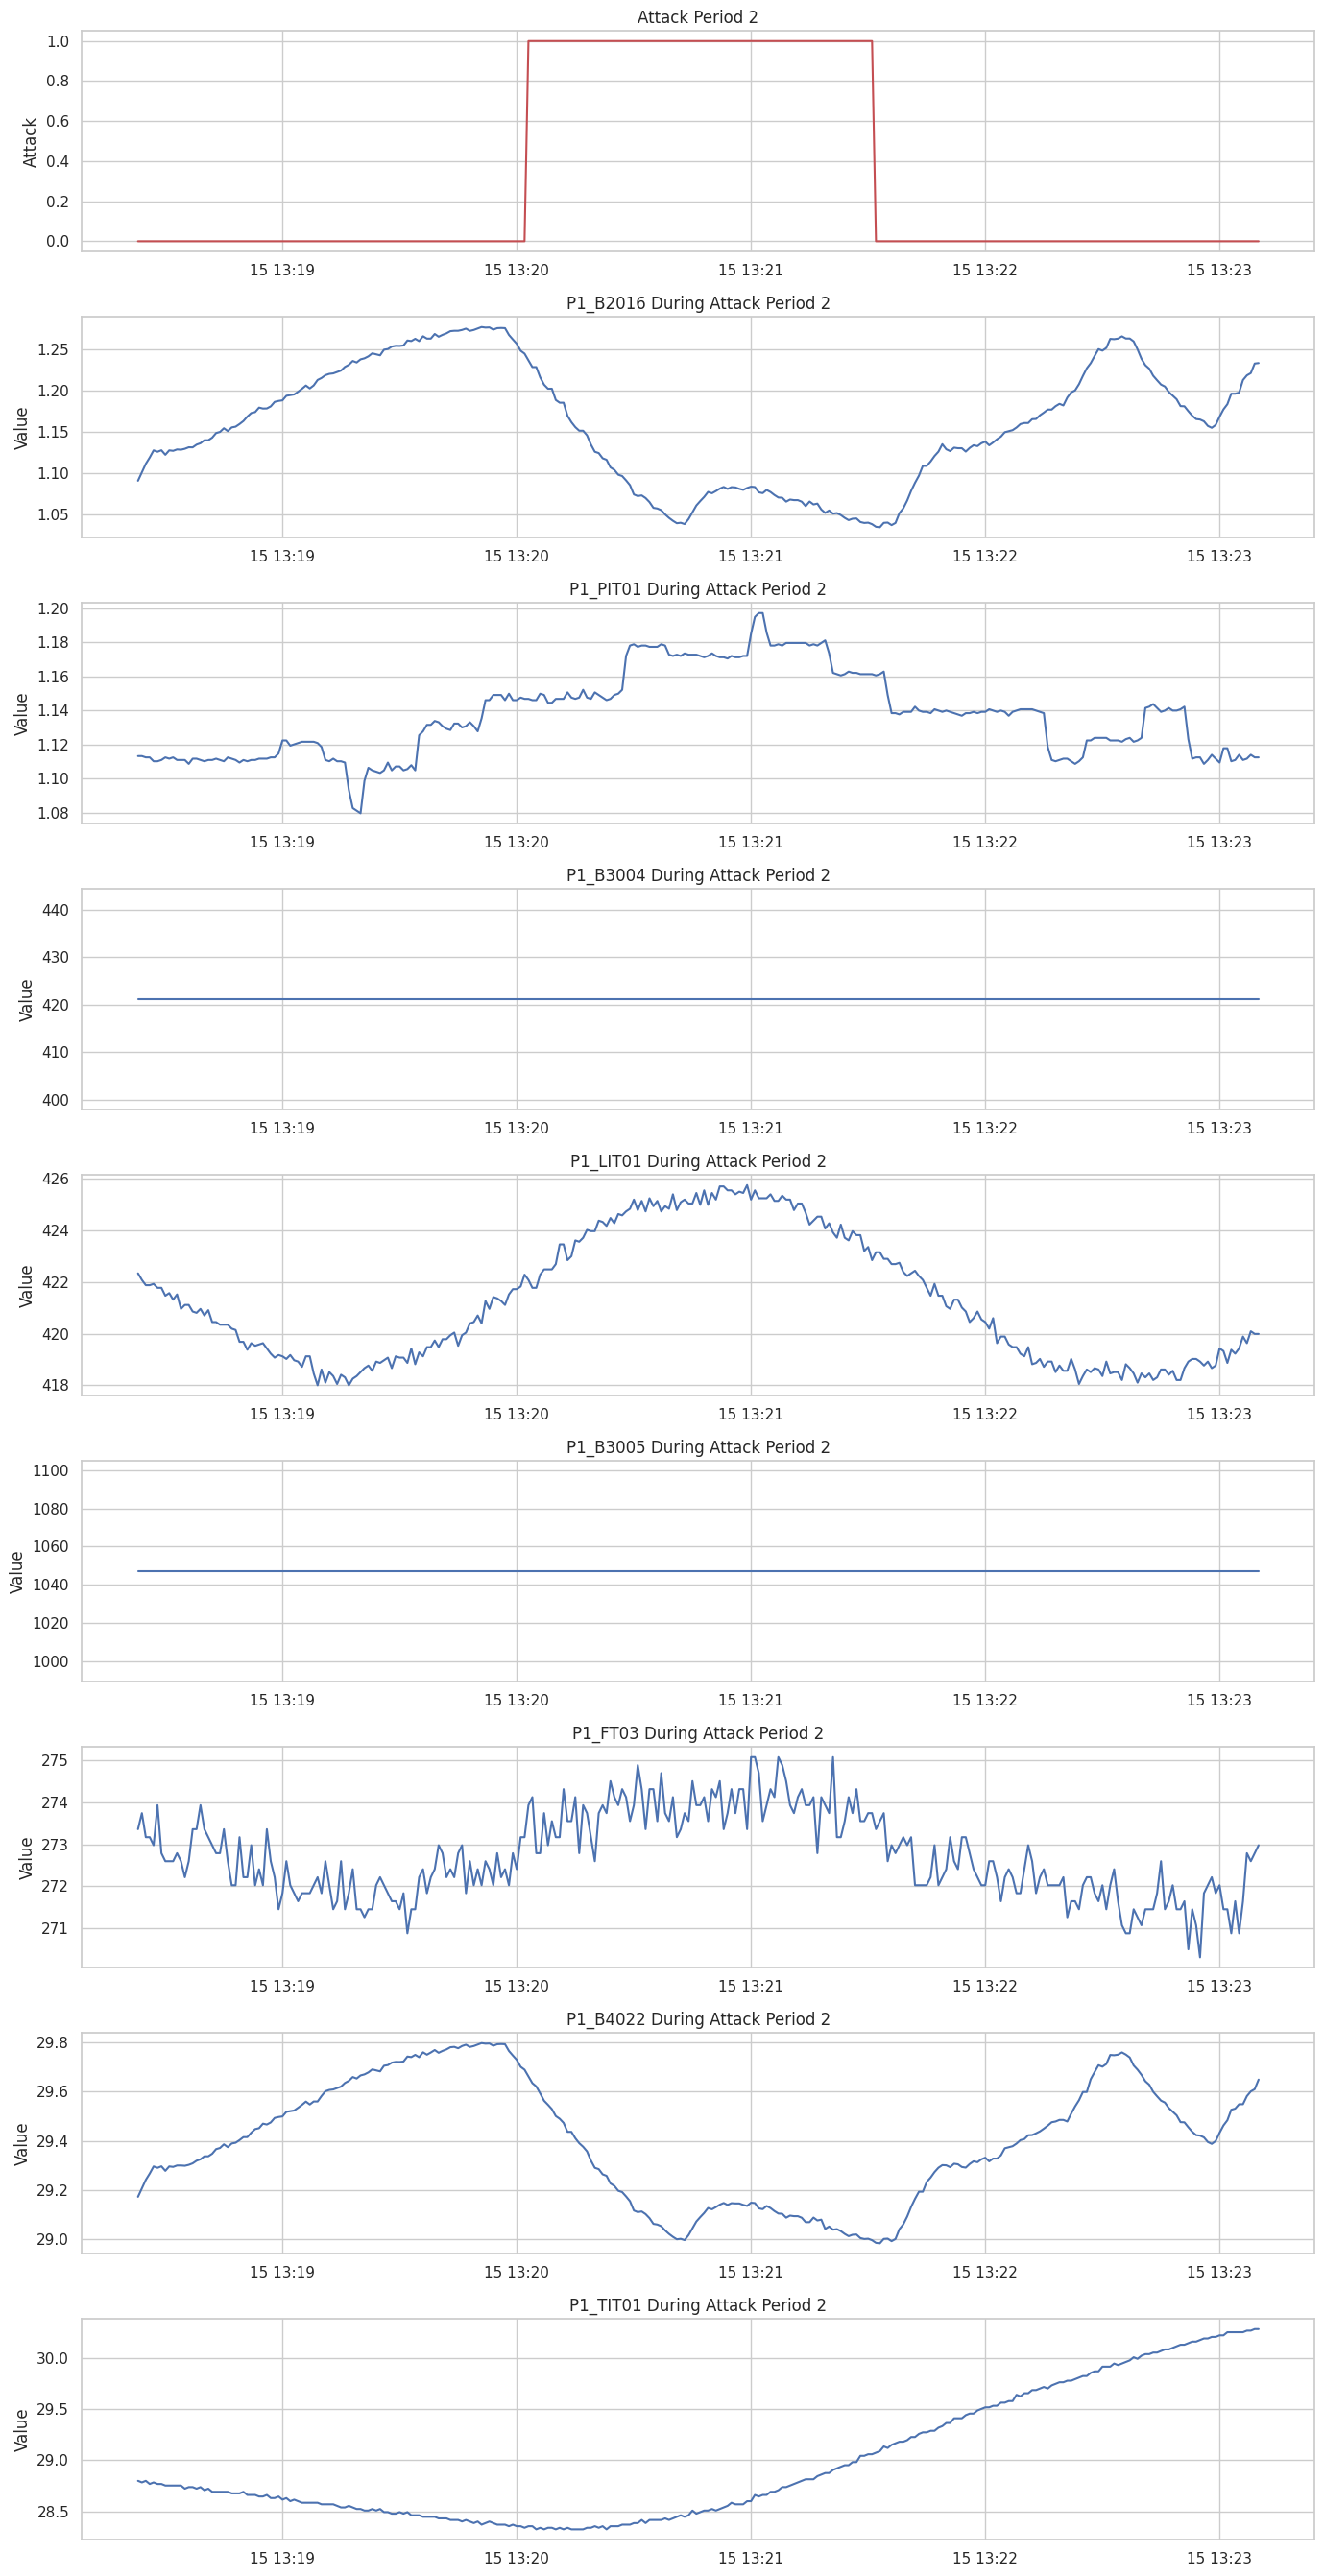

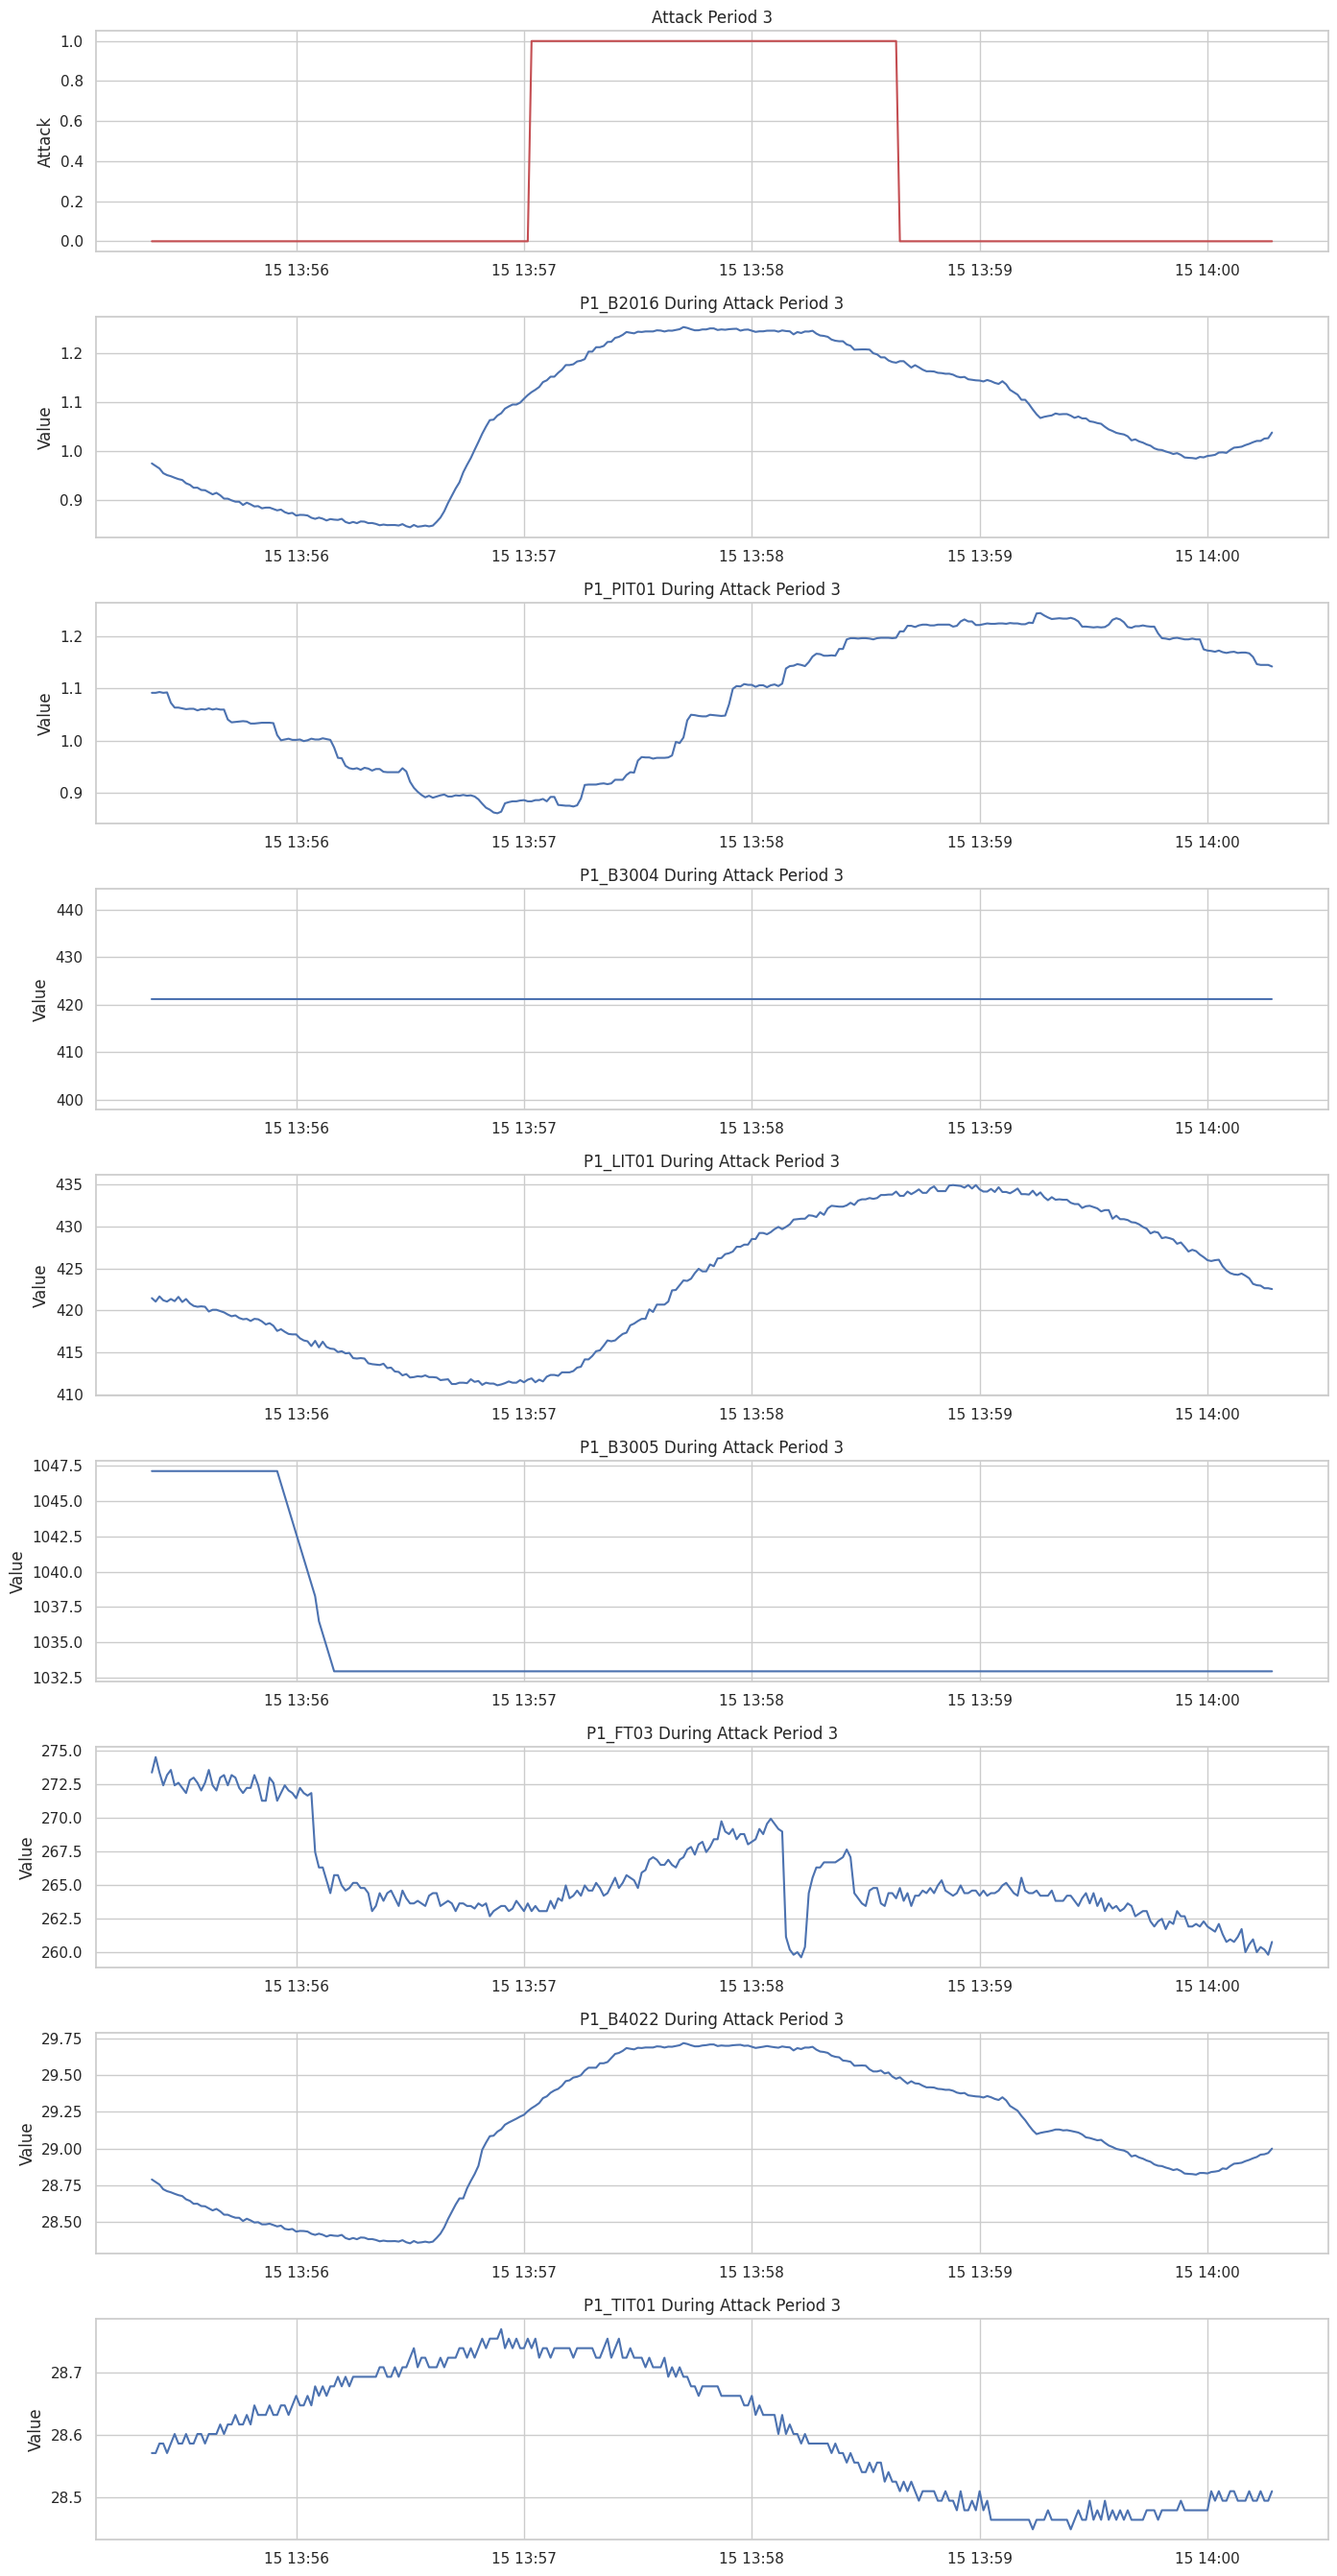

In [36]:
# Load a test dataset with attacks
test_file = test_files[0]  # Using the first test file
test_path = f'../hai-security-dataset/hai-22.04/{test_file}'
test_df = pd.read_csv(test_path)

# Convert timestamp to datetime
if 'timestamp' in test_df.columns:
    test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])

# Check for attack columns
attack_cols = [col for col in test_df.columns if 'attack' in col.lower()]
print(f"Attack columns in {test_file}: {attack_cols}")

if attack_cols:
    # Create a combined attack column if multiple attack columns exist
    if len(attack_cols) > 1:
        test_df['any_attack'] = test_df[attack_cols].max(axis=1)
        attack_col = 'any_attack'
    else:
        attack_col = attack_cols[0]
    
    # Find attack periods
    attack_starts = []
    attack_ends = []
    in_attack = False
    
    for i, row in test_df.iterrows():
        if row[attack_col] == 1 and not in_attack:
            attack_starts.append(i)
            in_attack = True
        elif row[attack_col] == 0 and in_attack:
            attack_ends.append(i-1)
            in_attack = False
    
    if in_attack:  # If dataset ends during an attack
        attack_ends.append(len(test_df)-1)
    
    print(f"Found {len(attack_starts)} attack periods")
    
    # Visualize the first few attack periods with key data points
    num_attacks_to_show = min(3, len(attack_starts))
    
    for i in range(num_attacks_to_show):
        start_idx = max(0, attack_starts[i] - 100)  # Include some pre-attack data
        end_idx = min(len(test_df)-1, attack_ends[i] + 100)  # Include some post-attack data
        
        attack_df = test_df.iloc[start_idx:end_idx].copy()
        
        # Plot key data points during this attack
        if existing_key_points:
            fig, axes = plt.subplots(len(existing_key_points)+1, 1, figsize=(14, 3*(len(existing_key_points)+1)))
            
            # Plot attack label
            axes[0].plot(attack_df['timestamp'], attack_df[attack_col], 'r-')
            axes[0].set_title(f'Attack Period {i+1}')
            axes[0].set_ylabel('Attack')
            
            # Plot each key point
            for j, point in enumerate(existing_key_points):
                if point in attack_df.columns:
                    axes[j+1].plot(attack_df['timestamp'], attack_df[point])
                    axes[j+1].set_title(f'{point} During Attack Period {i+1}')
                    axes[j+1].set_ylabel('Value')
            
            plt.tight_layout()
            plt.show()

## 9. Comparing Different HAI Dataset Versions

Let's compare the structure and characteristics of different HAI dataset versions.

In [52]:
# Function to get comprehensive information about a dataset version
def get_version_info(version):
    version_path = f'../hai-security-dataset/{version}'
    # Get all CSV files
    all_files = glob(f'{version_path}/*.csv')
    file_names = [os.path.basename(file) for file in all_files]
    
    # Improved patterns for identifying train and test files across all versions
    train_patterns = ['train', 'hai-train', 'end-train']
    test_patterns = ['test', 'hai-test', 'end-test']
    
    # Filter label files
    label_patterns = ['label-']
    data_files = [f for f in all_files if not any(pattern in os.path.basename(f).lower() for pattern in label_patterns)]
    
    # Identify train and test files
    train_files = [f for f in file_names if any(pattern in f.lower() for pattern in train_patterns)]
    test_files = [f for f in file_names if any(pattern in f.lower() for pattern in test_patterns)]
    
    # Determine column count more robustly by checking multiple files
    num_columns = 0
    column_names_sample = []
    files_checked = 0
    max_files_to_check = 3  # Limit the number of files to check
    
    # List of separators to try
    separators = [',', ';', '\t', '|']
    
    # Dictionary to store sample info
    sample_info = {}
    
    # Prioritize data files over label files for column checking
    for file in data_files:
        if files_checked >= max_files_to_check:
            break
            
        file_basename = os.path.basename(file)
        max_cols = 0
        best_sep = ','
        successful = False
        
        # Try different separators
        for sep in separators:
            try:
                df = pd.read_csv(file, sep=sep)
                cols = len(df.columns)
                
                # If this separator gives more columns, it's probably correct
                if cols > max_cols and cols > 1:
                    max_cols = cols
                    best_sep = sep
                    successful = True
                    
                    # Store sample information
                    sample_info[file_basename] = {
                        'separator': sep,
                        'columns': cols,
                        'sample_columns': list(df.columns[:5]),
                        'data_types': str(df.dtypes.head(3)),
                        'rows': len(df)
                    }
            except Exception as e:
                continue
        
        if successful:
            print(f"  - Checked {file_basename}: {max_cols} columns (separator='{best_sep}')")
            print(f"    Sample columns: {sample_info[file_basename]['sample_columns']}")
            
            if max_cols > num_columns:
                num_columns = max_cols
                if column_names_sample == [] or len(column_names_sample) < 5:
                    column_names_sample = sample_info[file_basename]['sample_columns']
            
            files_checked += 1
        else:
            print(f"  - Error reading {file_basename}: Could not determine separator")
    
    # Additional analysis for HAI-20.07 and HAIEnd-23.05 if needed
    special_note = ""
    if version == "hai-20.07" and num_columns <= 1:
        special_note = "WARNING: HAI-20.07 appears to have parsing issues. Check file format."
    elif version == "haiend-23.05" and num_columns > 200:
        special_note = "NOTE: HAIEnd-23.05 has significantly more columns than other versions."
    
    return {
        'version': version,
        'total_files': len(all_files),
        'train_files': len(train_files),
        'test_files': len(test_files),
        'train_file_names': train_files,
        'test_file_names': test_files,
        'num_columns': num_columns,
        'sample_columns': column_names_sample,
        'special_note': special_note
    }

# Get information for all dataset versions
version_info = []
for version in dataset_versions:
    try:
        print(f"Processing {version}...")
        info = get_version_info(version)
        version_info.append(info)
        print(f"Processed {version}")
        if info['special_note']:
            print(f"NOTE: {info['special_note']}")
        print("-" * 50)
    except Exception as e:
        print(f"Error processing {version}: {e}")

# Display information in a table
version_info_df = pd.DataFrame(version_info)
# Show basic information
basic_info = version_info_df[['version', 'total_files', 'train_files', 'test_files', 'num_columns']]
print("\nBasic Dataset Information:")
print(basic_info)

# Show sample columns for each version
print("\nSample Columns by Version:")
for idx, row in version_info_df.iterrows():
    version = row['version']
    sample_cols = row['sample_columns']
    print(f"{version}: {sample_cols}")
    if row['special_note']:
        print(f"  NOTE: {row['special_note']}")

Processing hai-21.03...
  - Checked train3.csv: 84 columns (separator=',')
    Sample columns: ['time', 'P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005']
  - Checked train2.csv: 84 columns (separator=',')
    Sample columns: ['time', 'P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005']
  - Checked train1.csv: 84 columns (separator=',')
    Sample columns: ['time', 'P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005']
Processed hai-21.03
--------------------------------------------------
Processing hai-20.07...
  - Checked train2.csv: 64 columns (separator=';')
    Sample columns: ['time', 'P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005']
  - Checked train1.csv: 64 columns (separator=';')
    Sample columns: ['time', 'P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005']
  - Checked test2.csv: 64 columns (separator=';')
    Sample columns: ['time', 'P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005']
Processed hai-20.07
--------------------------------------------------
Processing hai-22.04...
  - Checked train6.

## 10. Statistical Analysis of Data Points

Let's perform statistical analysis on key data points to understand their distributions and characteristics.

In [46]:
# Load a training dataset
train_file = train_files[0]  # Using the first training file
train_path = f'../hai-security-dataset/hai-22.04/{train_file}'
train_df = pd.read_csv(train_path)

# Select numerical columns (excluding timestamp and attack labels)
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if not ('attack' in col.lower() or 'timestamp' in col.lower())]

# Calculate basic statistics
stats = train_df[numerical_cols].describe()
stats

P1_B2004      P1_B2016       P1_B3004       P1_B3005  \
count  259200.000000  259200.00000  259200.000000  259200.000000   
mean        0.124835       1.10653     448.660921    1009.342048   
std         0.041589       0.10260      28.188166      39.038789   
min         0.060830       0.78265     396.683040     951.369260   
25%         0.098440       1.04139     434.844060     976.467530   
50%         0.114920       1.10571     452.391300    1012.014280   
75%         0.166780       1.17112     469.146240    1030.604610   
max         0.198460       1.62739     496.014710    1110.036130   

            P1_B4002       P1_B4005       P1_B400B       P1_B4022  \
count  259200.000000  259200.000000  259200.000000  259200.000000   
mean       31.407774      92.383394    2942.842726      35.180069   
std         1.503523      24.384918     770.815531       1.531546   
min        26.041370       0.000000      17.081060      29.146510   
25%        31.548540     100.000000    3177.362790      35.209470   
50%        32.000000     100.000000    3183.243410      35.610130   
75%        32.000000     100.000000    3188.123050      35.859300   
max        33.048470     100.000000    3190.000000      37.768740   

           P1_FCV01D      P1_FCV01Z  ...       P4_HT_PO       P4_HT_PS  \
count  259200.000000  259200.000000  ...  259200.000000  259200.000000   
mean       88.835944      89.254170  ...      34.986479       3.474197   
std        25.136413      25.400452  ...      31.242254       3.741219   
min         1.778520       0.306700  ...       0.090420       0.000000   
25%        92.083610      92.637630  ...       0.632930       0.000000   
50%       100.000000     100.282280  ...      33.239320       1.294500   
75%       100.000000     100.740050  ...      67.111570       6.561320   
max       100.000000     100.762940  ...      91.688420      10.000000   

               P4_LD       P4_ST_FD      P4_ST_GOV       P4_ST_LD  \
count  259200.000000  259200.000000  259200.000000  259200.000000   
mean      366.117862      -0.000029   18067.928870     330.992421   
std        59.880538       0.001640    1749.375984      35.758688   
min       232.132510      -0.012590   12925.000000     232.186770   
25%       318.992310      -0.001090   17076.000000     307.599120   
50%       364.565250      -0.000070   18037.000000     330.964290   
75%       414.062500       0.001010   19057.000000     353.823060   
max       499.312810       0.040510   26826.000000     496.853270   

            P4_ST_PO       P4_ST_PS     P4_ST_PT01     P4_ST_TT01  
count  259200.000000  259200.000000  259200.000000  259200.000000  
mean      331.258768      12.608794    9973.381474   27280.175320  
std        32.287839      13.753672      22.893563      78.150059  
min       236.490910       0.000000    9834.000000   26998.000000  
25%       313.024480       3.481090    9968.000000   27236.000000  
50%       330.656800      10.733520    9973.000000   27274.000000  
75%       349.392330      15.238640    9998.000000   27319.000000  
max       494.267210      50.000000   10195.000000   27543.000000  

[8 rows x 86 columns]

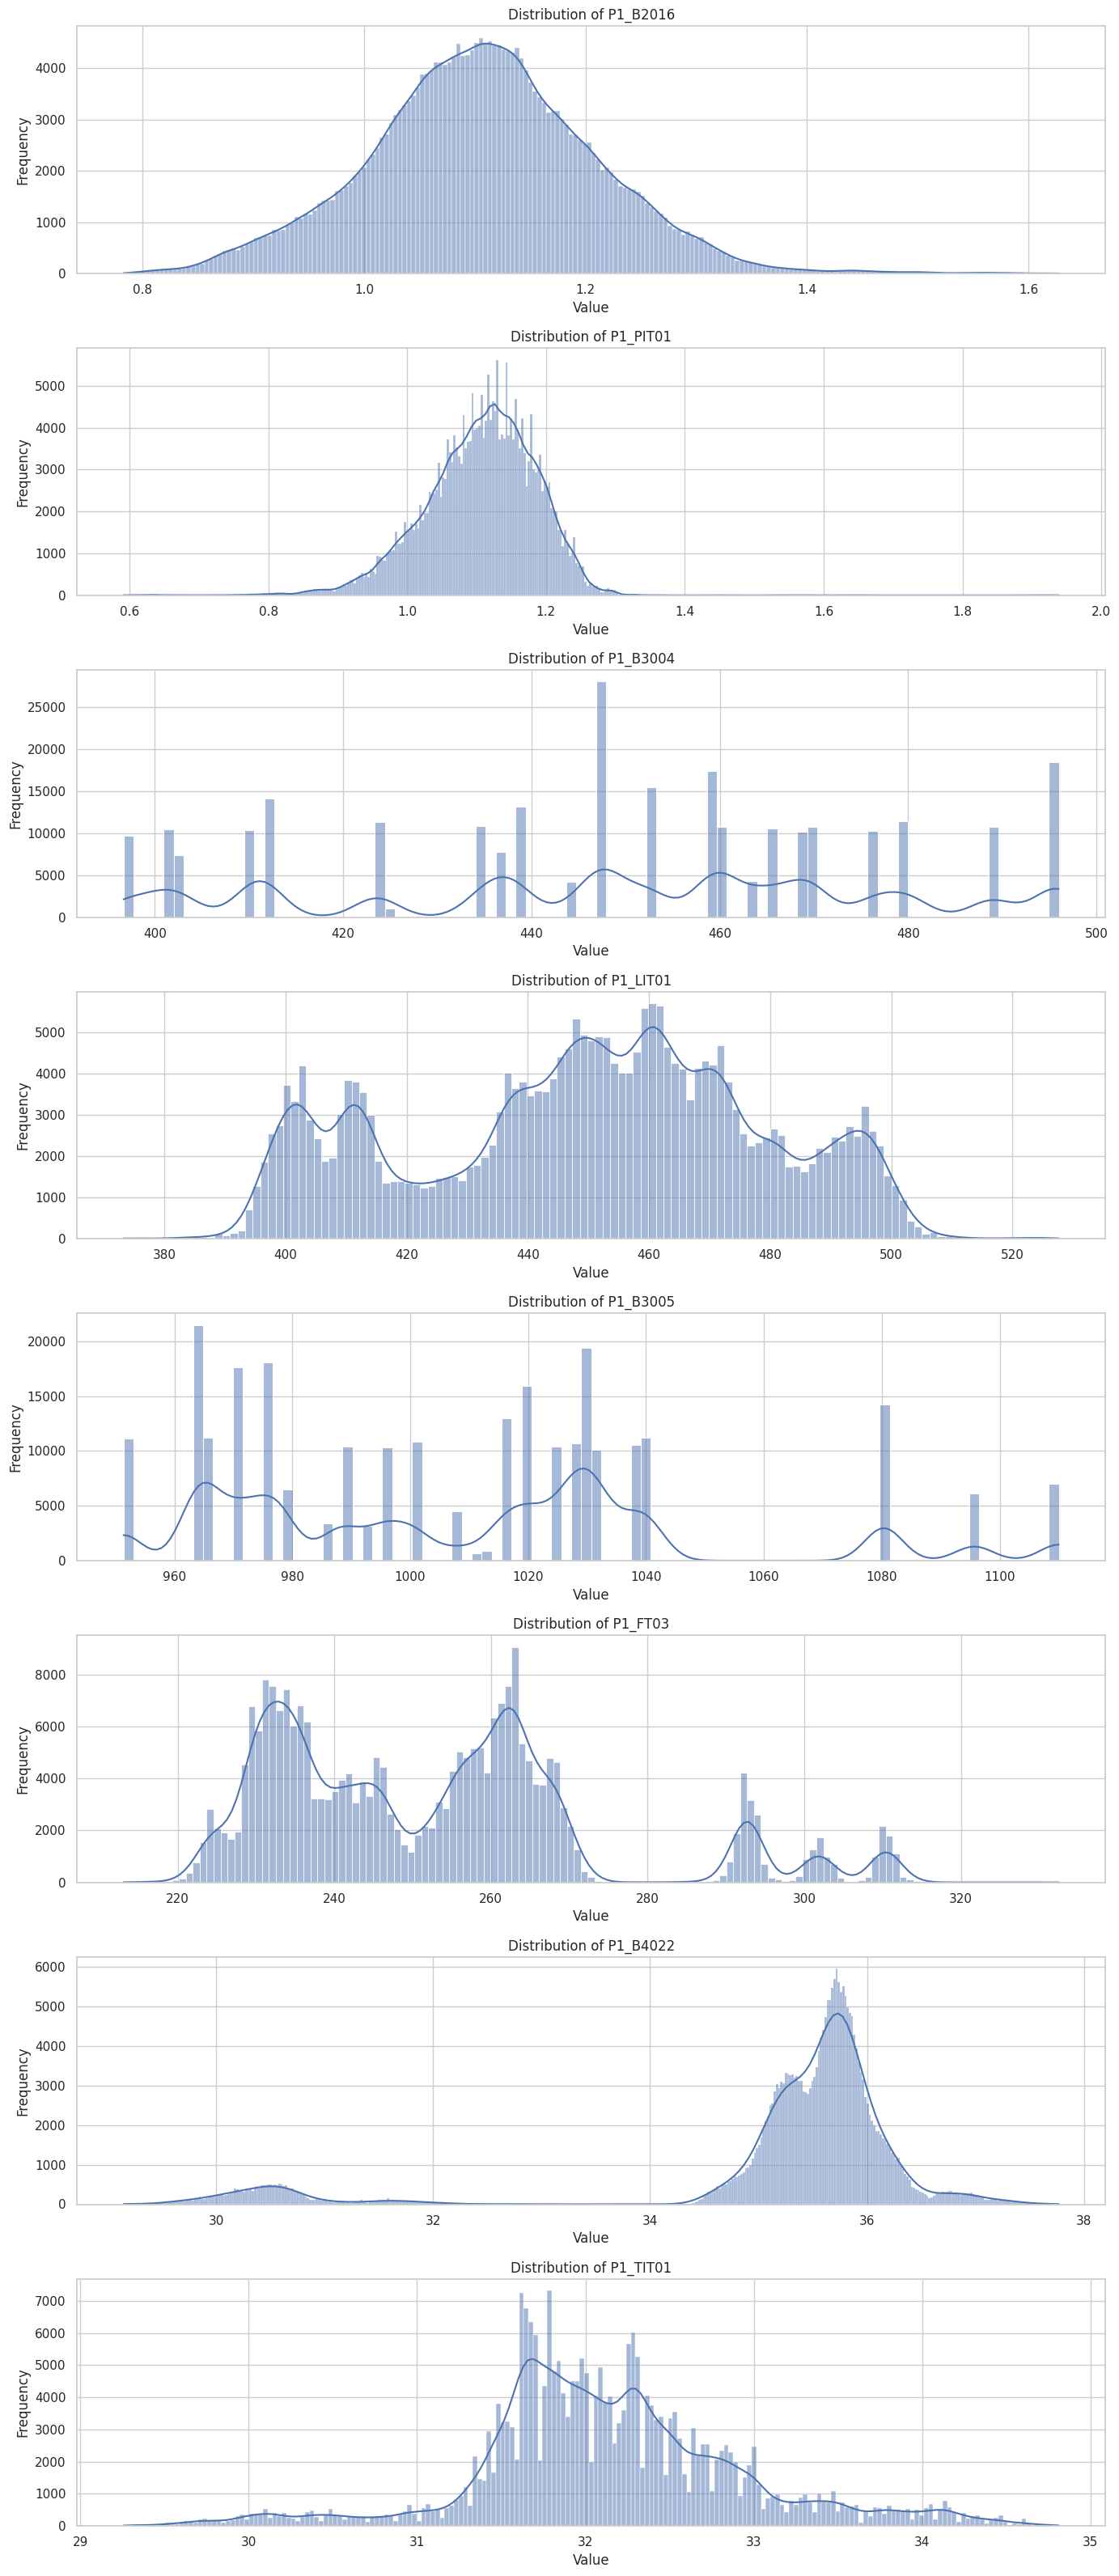

In [47]:
# Visualize distributions of key data points
if existing_key_points:
    # Create histograms for each key point
    fig, axes = plt.subplots(len(existing_key_points), 1, figsize=(14, 4*len(existing_key_points)))
    
    for i, point in enumerate(existing_key_points):
        if point in train_df.columns:
            sns.histplot(train_df[point], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {point}')
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

## 11. Analyzing Control Loops

Based on the technical details, the dataset includes data from various control loops (P1-PC, P1-LC, P1-FC, P1-TC, P2-SC, P3-LC). Let's analyze the relationships between setpoints (SP), process variables (PV), and control variables (CV) in these control loops.


Analyzing P1-PC control loop


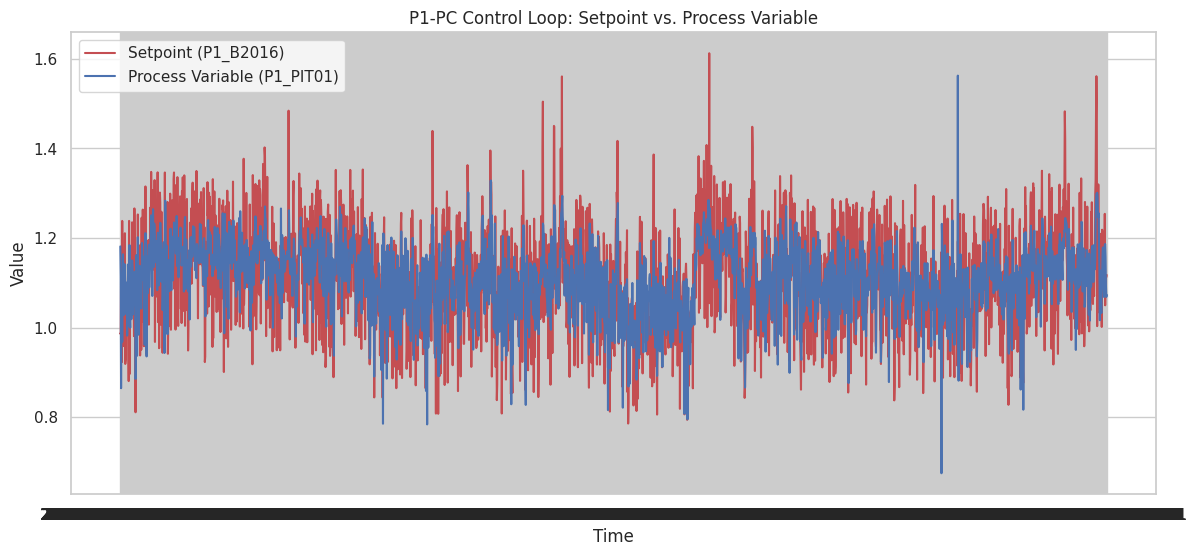

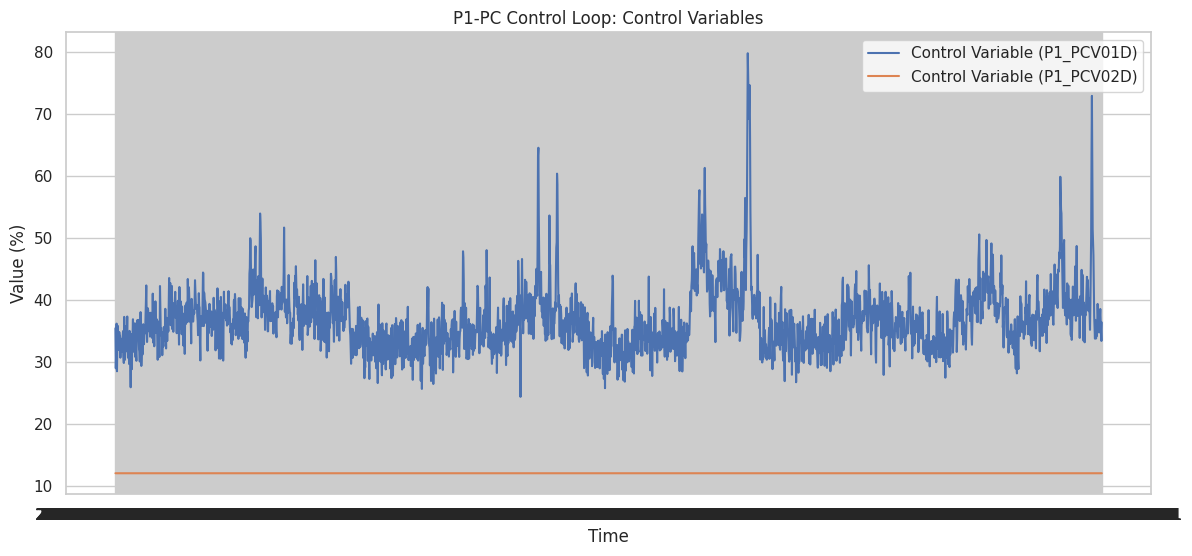

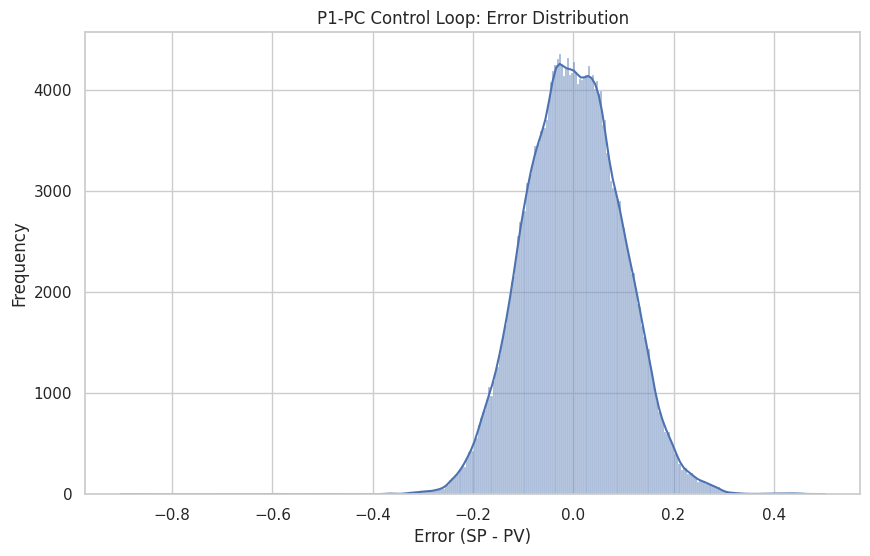


Analyzing P1-LC control loop


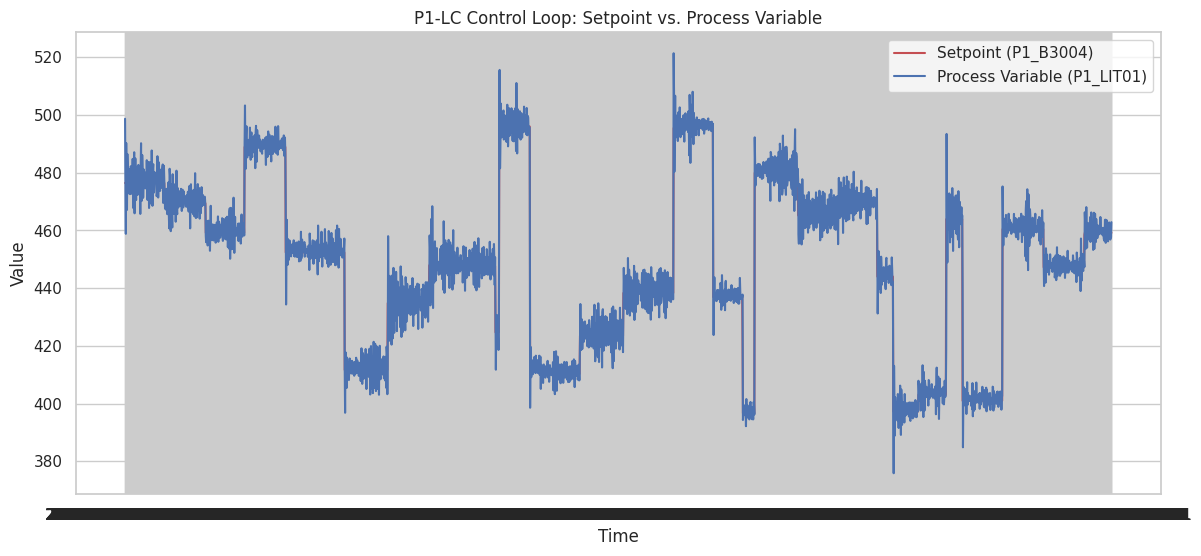

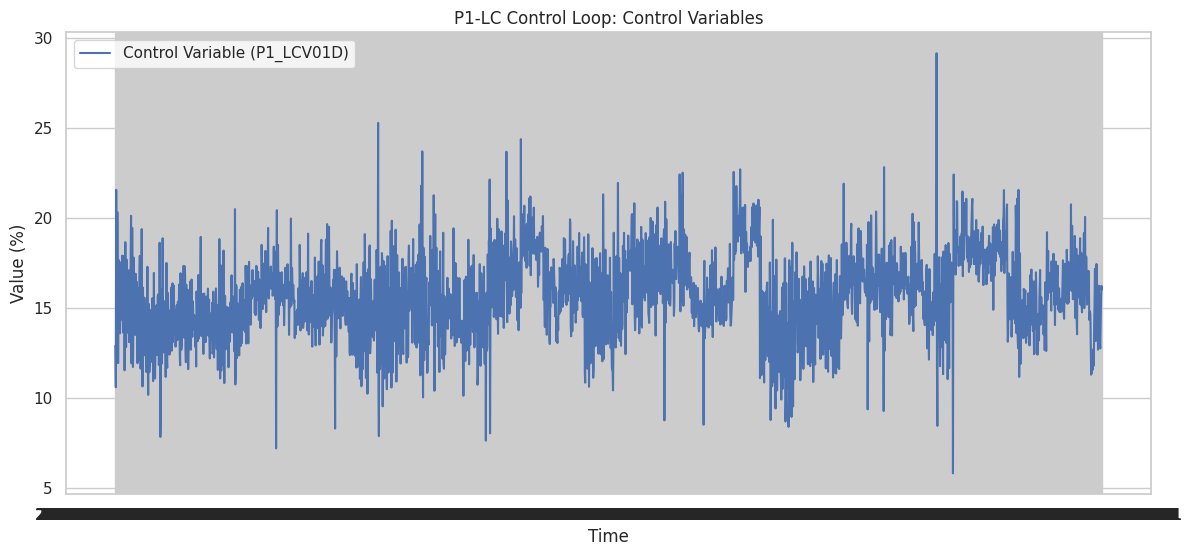

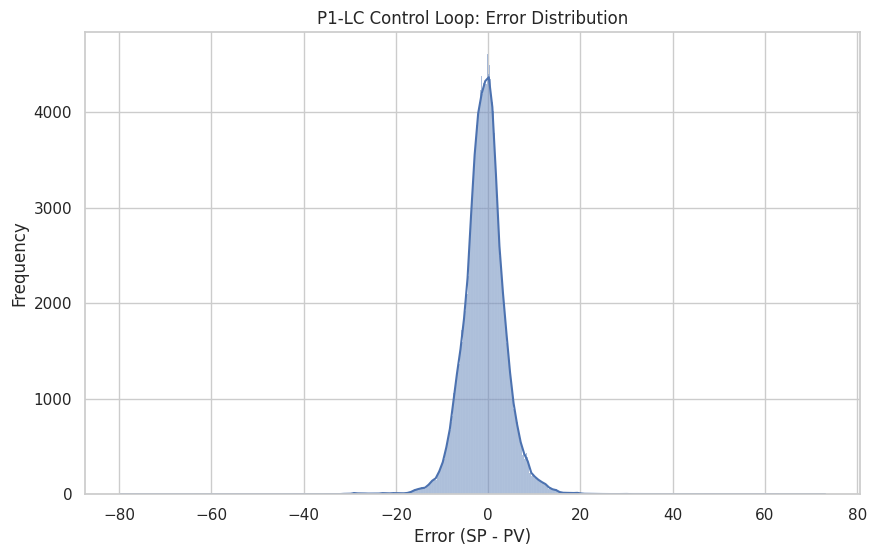


Analyzing P1-FC control loop


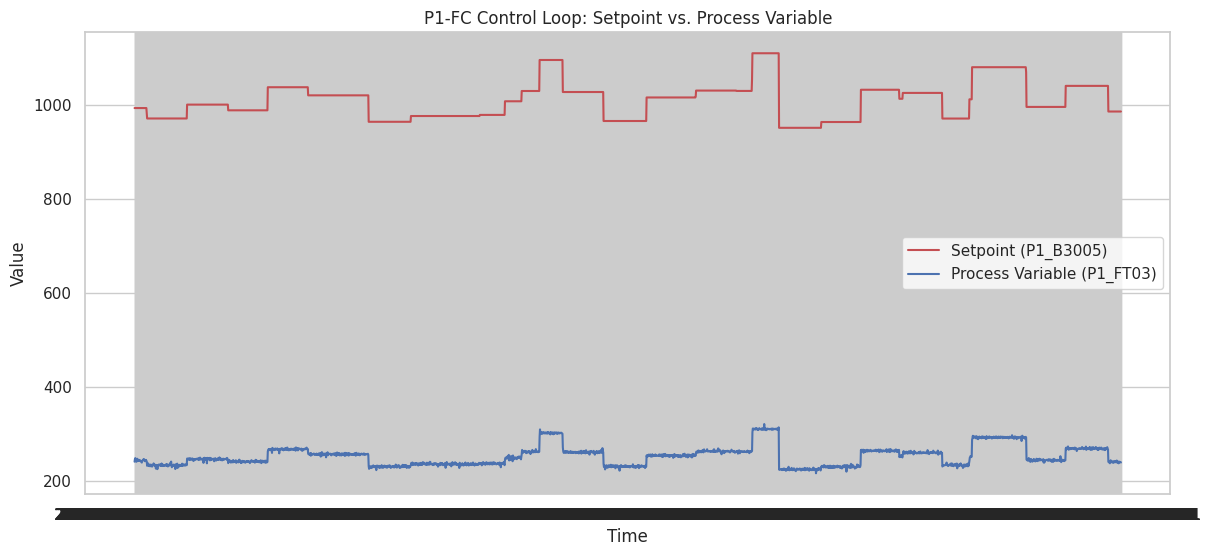

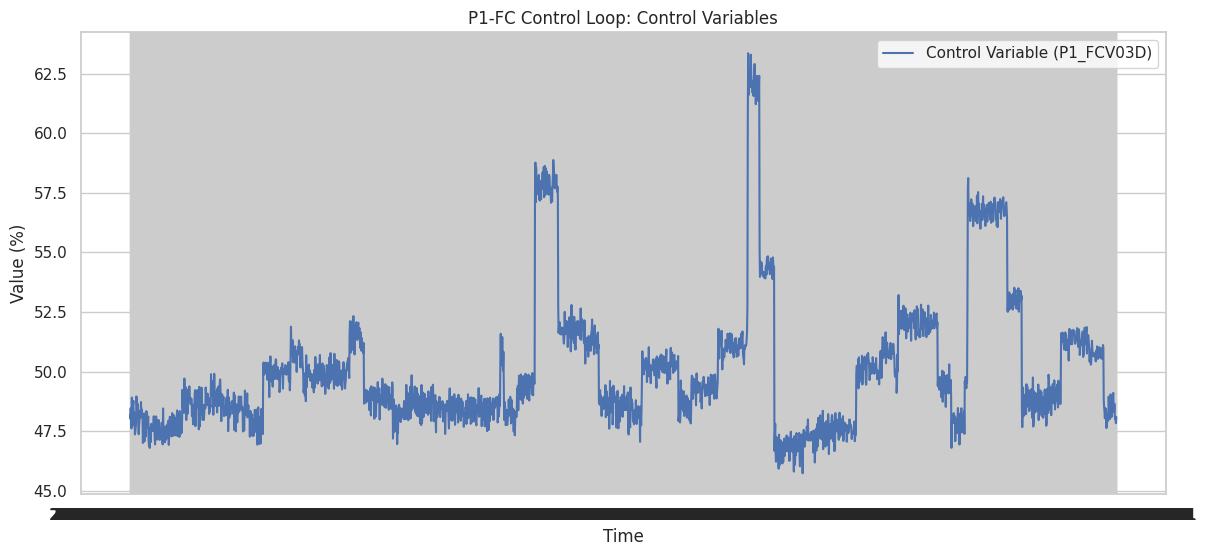

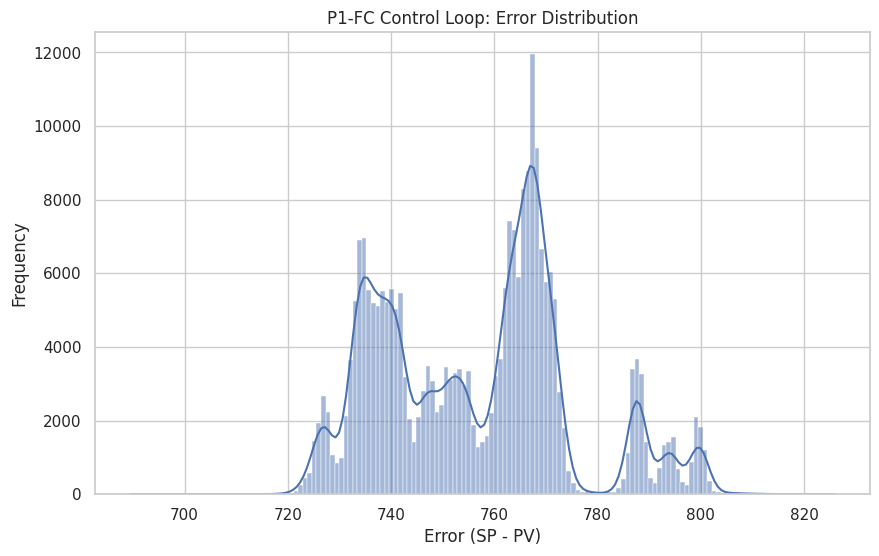


Analyzing P1-TC control loop


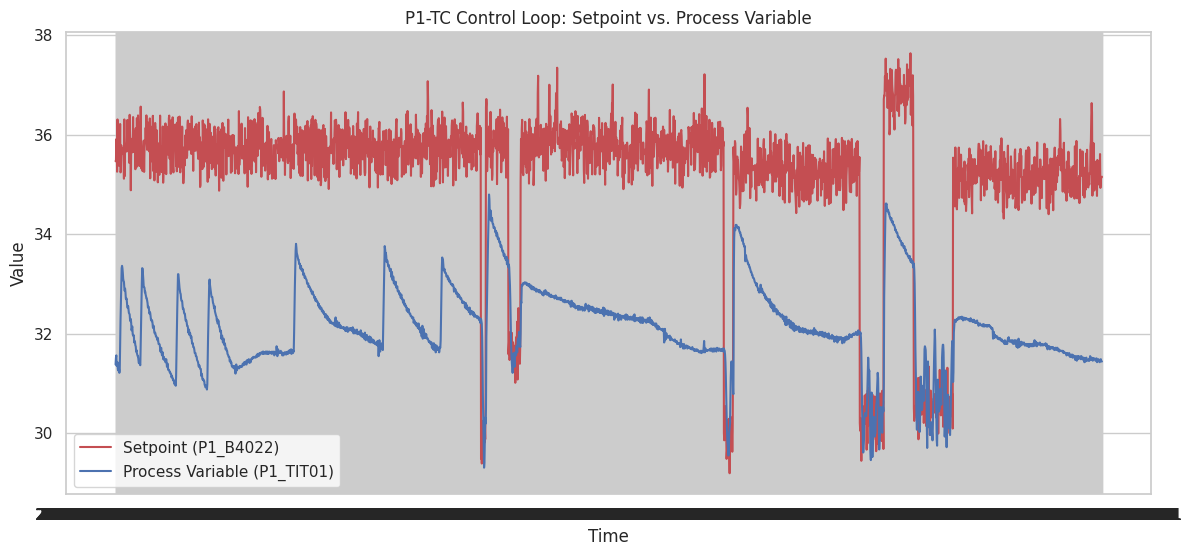

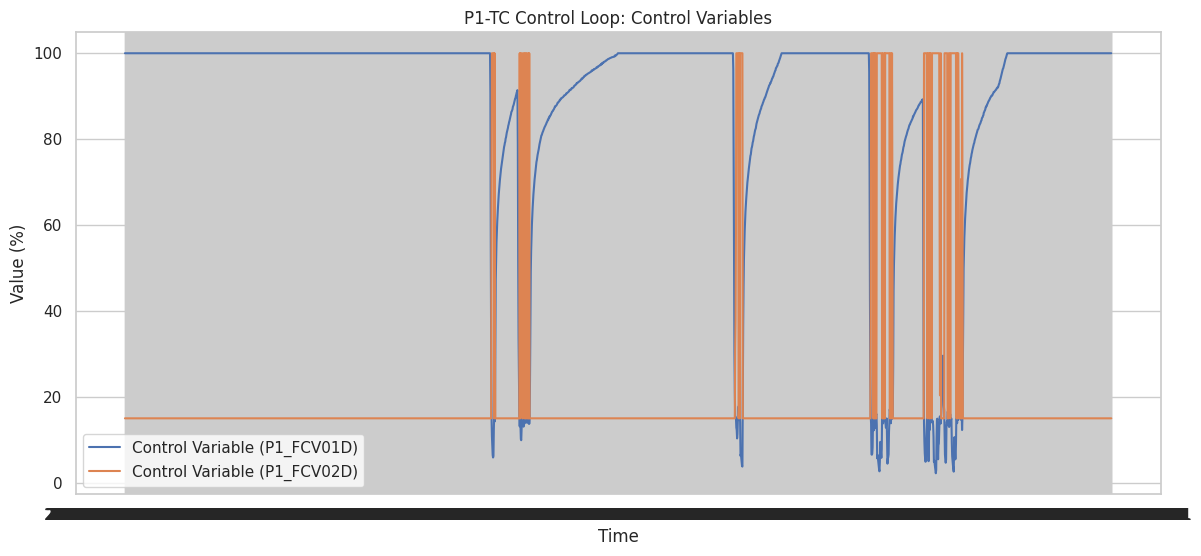

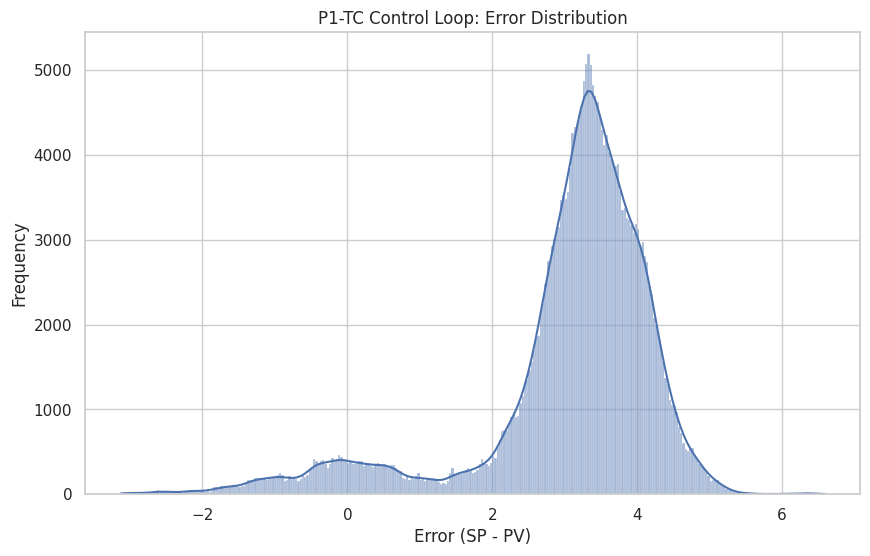

In [48]:
# Define control loops with their setpoints, process variables, and control variables
control_loops = {
    'P1-PC': {
        'SP': 'P1_B2016',  # Pressure demand
        'PV': 'P1_PIT01',  # Heat-exchanger outlet pressure
        'CV': ['P1_PCV01D', 'P1_PCV02D']  # Position command for pressure control valves
    },
    'P1-LC': {
        'SP': 'P1_B3004',  # Water level setpoint
        'PV': 'P1_LIT01',  # Water level of the return water tank
        'CV': 'P1_LCV01D'  # Position command for level control valve
    },
    'P1-FC': {
        'SP': 'P1_B3005',  # Discharge flowrate setpoint
        'PV': 'P1_FT03',   # Measured flowrate of the return water tank
        'CV': 'P1_FCV03D'  # Position command for flow control valve
    },
    'P1-TC': {
        'SP': 'P1_B4022',  # Temperature demand
        'PV': 'P1_TIT01',  # Heat-exchanger outlet temperature
        'CV': ['P1_FCV01D', 'P1_FCV02D']  # Position command for flow control valves
    }
}

# Analyze each control loop
for loop_name, loop_vars in control_loops.items():
    print(f"\nAnalyzing {loop_name} control loop")
    
    # Check if all variables exist in the dataset
    sp = loop_vars['SP']
    pv = loop_vars['PV']
    cv = loop_vars['CV'] if isinstance(loop_vars['CV'], list) else [loop_vars['CV']]
    
    missing_vars = [var for var in [sp, pv] + cv if var not in train_df.columns]
    if missing_vars:
        print(f"  Missing variables: {missing_vars}")
        continue
    
    # Plot setpoint and process variable
    plt.figure(figsize=(14, 6))
    
    # Sample data to reduce plotting time (every 100th point)
    sampled_df = train_df.iloc[::100].copy()
    
    plt.plot(sampled_df['timestamp'], sampled_df[sp], 'r-', label=f'Setpoint ({sp})')
    plt.plot(sampled_df['timestamp'], sampled_df[pv], 'b-', label=f'Process Variable ({pv})')
    
    plt.title(f'{loop_name} Control Loop: Setpoint vs. Process Variable')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
    # Plot control variables
    plt.figure(figsize=(14, 6))
    
    for control_var in cv:
        plt.plot(sampled_df['timestamp'], sampled_df[control_var], label=f'Control Variable ({control_var})')
    
    plt.title(f'{loop_name} Control Loop: Control Variables')
    plt.xlabel('Time')
    plt.ylabel('Value (%)')
    plt.legend()
    plt.show()
    
    # Calculate error (difference between setpoint and process variable)
    train_df[f'{loop_name}_error'] = train_df[sp] - train_df[pv]
    
    # Plot error histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[f'{loop_name}_error'], kde=True)
    plt.title(f'{loop_name} Control Loop: Error Distribution')
    plt.xlabel('Error (SP - PV)')
    plt.ylabel('Frequency')
    plt.show()

## 12. Analyzing Attack Scenarios

Let's analyze the attack scenarios in the test datasets to understand their impact on different control loops.

Attack columns in test4.csv: ['Attack']

Found 24 attack periods for P1-PC


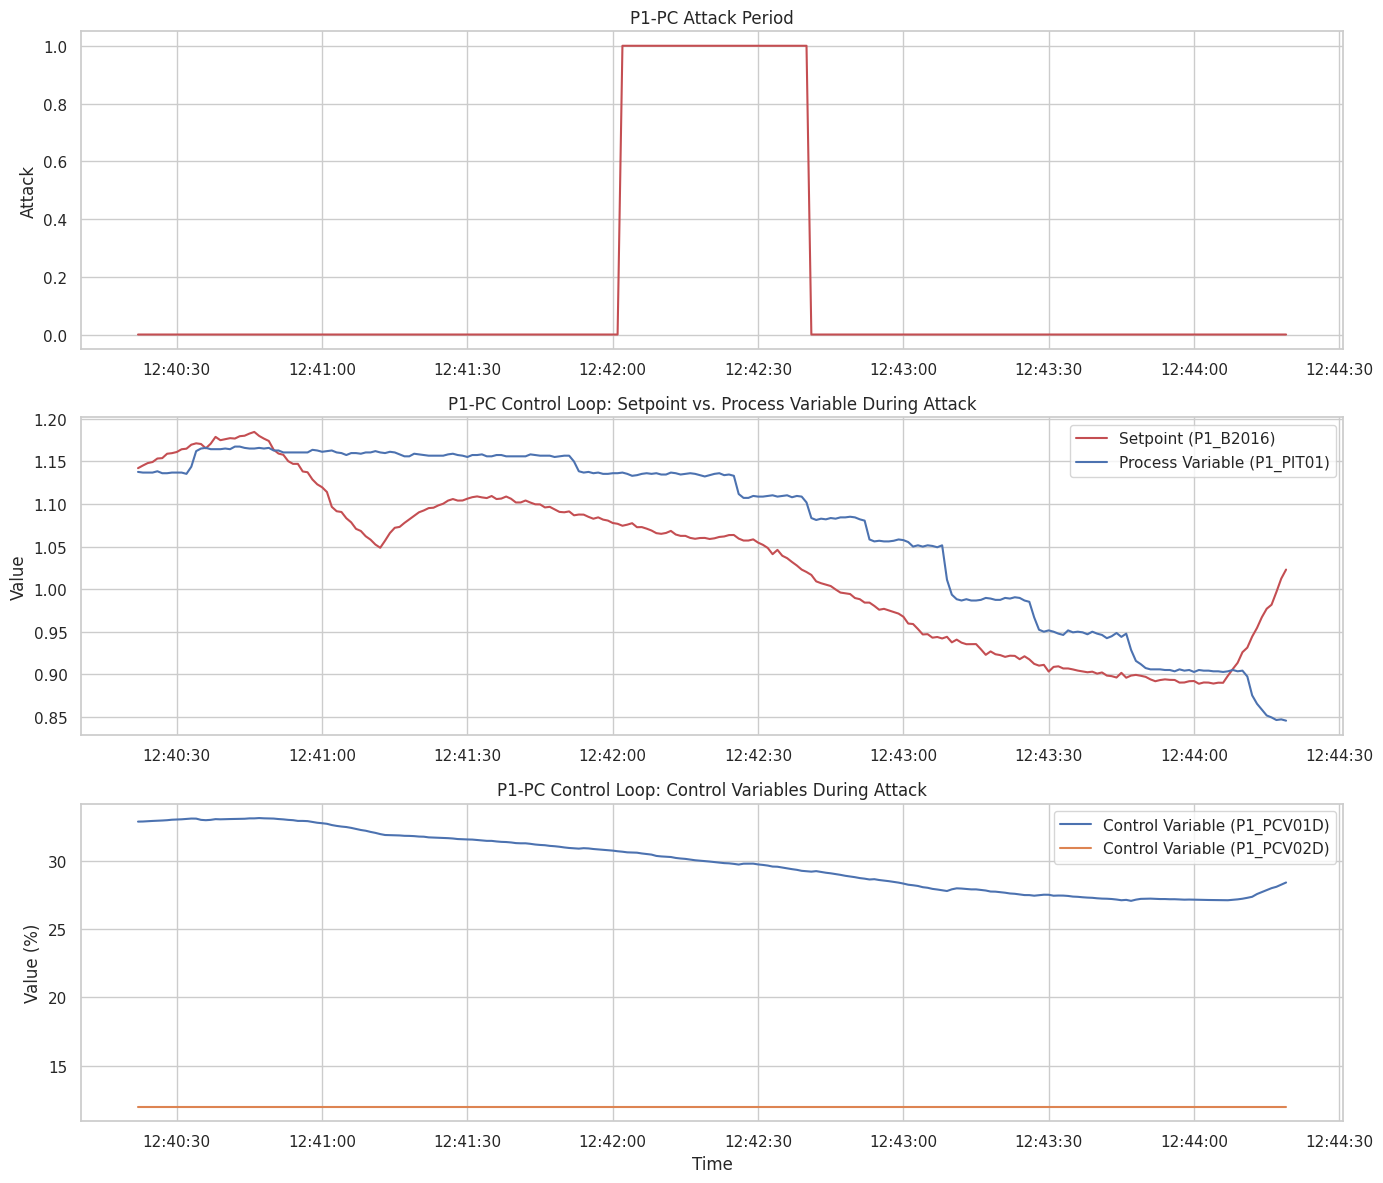


Found 24 attack periods for P1-LC


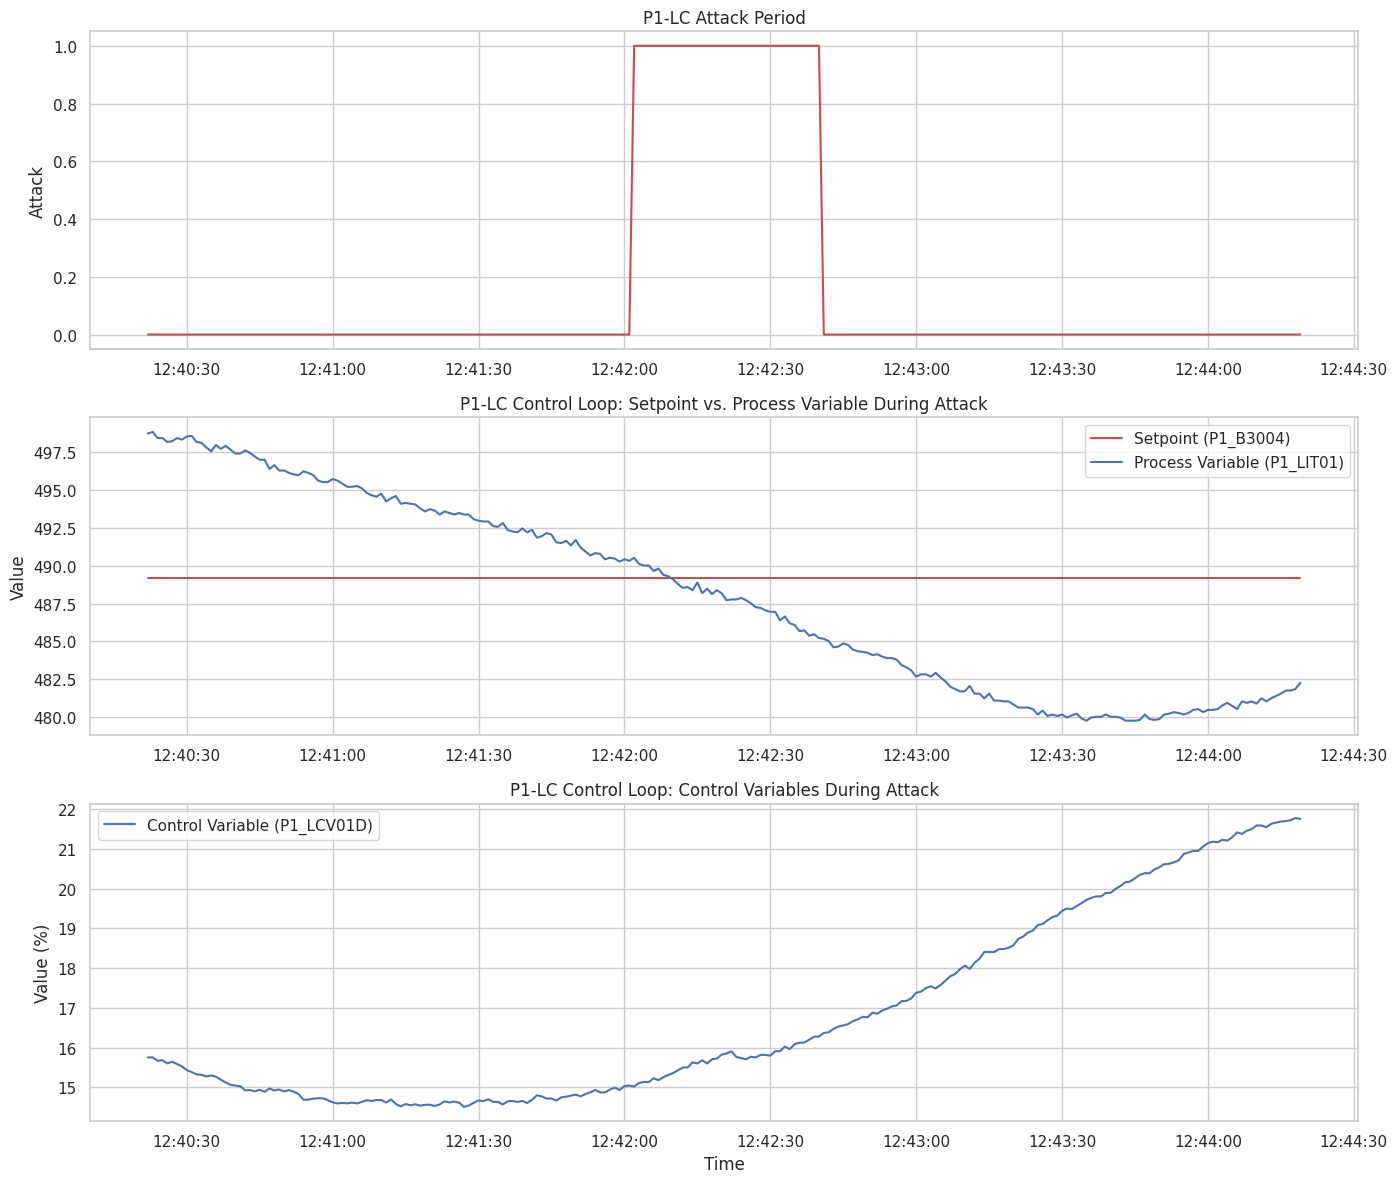


Found 24 attack periods for P1-FC


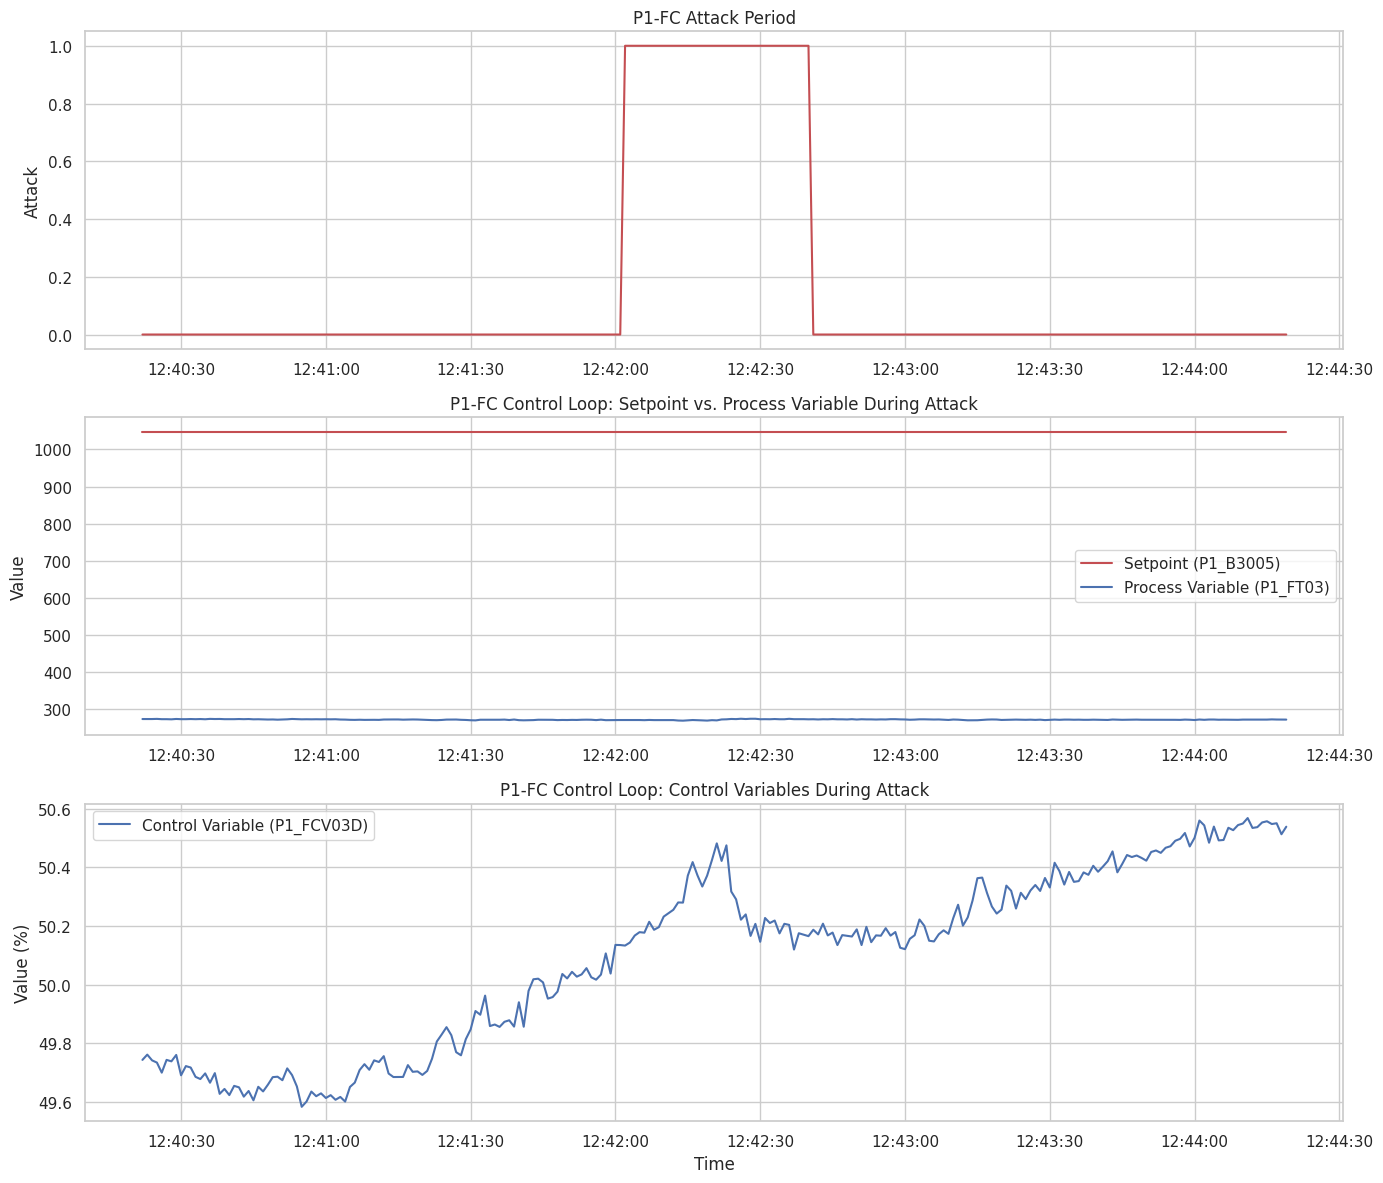


Found 24 attack periods for P1-TC


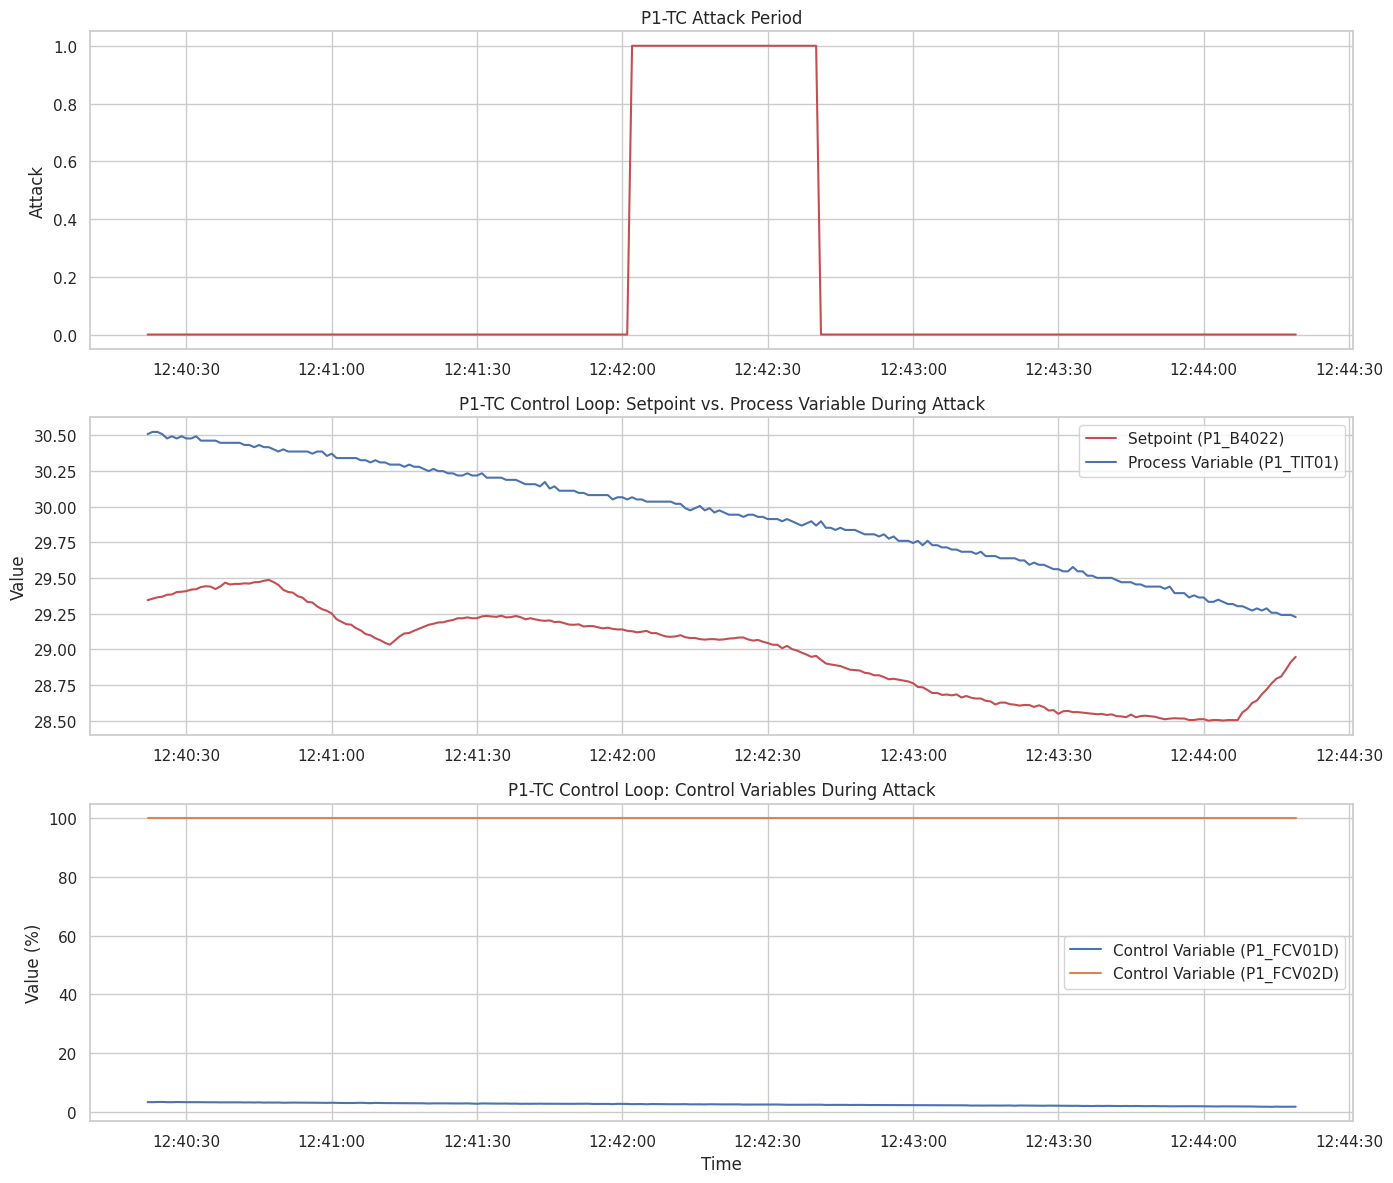

In [49]:
# Load a test dataset
test_file = test_files[0]  # Using the first test file
test_path = f'../hai-security-dataset/hai-22.04/{test_file}'
test_df = pd.read_csv(test_path)

# Convert timestamp to datetime
if 'timestamp' in test_df.columns:
    test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])

# Check for attack columns
attack_cols = [col for col in test_df.columns if 'attack' in col.lower()]
print(f"Attack columns in {test_file}: {attack_cols}")

if attack_cols:
    # Analyze attacks for each control loop
    for loop_name, loop_vars in control_loops.items():
        # Check if all variables exist in the dataset
        sp = loop_vars['SP']
        pv = loop_vars['PV']
        cv = loop_vars['CV'] if isinstance(loop_vars['CV'], list) else [loop_vars['CV']]
        
        missing_vars = [var for var in [sp, pv] + cv if var not in test_df.columns]
        if missing_vars:
            print(f"  Missing variables for {loop_name}: {missing_vars}")
            continue
        
        # Find attack periods specific to this control loop if possible
        loop_attack_col = next((col for col in attack_cols if loop_name.lower() in col.lower()), attack_cols[0])
        
        # Find attack periods
        attack_starts = []
        attack_ends = []
        in_attack = False
        
        for i, row in test_df.iterrows():
            if row[loop_attack_col] == 1 and not in_attack:
                attack_starts.append(i)
                in_attack = True
            elif row[loop_attack_col] == 0 and in_attack:
                attack_ends.append(i-1)
                in_attack = False
        
        if in_attack:  # If dataset ends during an attack
            attack_ends.append(len(test_df)-1)
        
        print(f"\nFound {len(attack_starts)} attack periods for {loop_name}")
        
        if not attack_starts:
            continue
        
        # Analyze the first attack period
        start_idx = max(0, attack_starts[0] - 100)  # Include some pre-attack data
        end_idx = min(len(test_df)-1, attack_ends[0] + 100)  # Include some post-attack data
        
        attack_df = test_df.iloc[start_idx:end_idx].copy()
        
        # Plot setpoint, process variable, and control variables during the attack
        fig, axes = plt.subplots(3, 1, figsize=(14, 12))
        
        # Plot attack label
        axes[0].plot(attack_df['timestamp'], attack_df[loop_attack_col], 'r-')
        axes[0].set_title(f'{loop_name} Attack Period')
        axes[0].set_ylabel('Attack')
        
        # Plot setpoint and process variable
        axes[1].plot(attack_df['timestamp'], attack_df[sp], 'r-', label=f'Setpoint ({sp})')
        axes[1].plot(attack_df['timestamp'], attack_df[pv], 'b-', label=f'Process Variable ({pv})')
        axes[1].set_title(f'{loop_name} Control Loop: Setpoint vs. Process Variable During Attack')
        axes[1].set_ylabel('Value')
        axes[1].legend()
        
        # Plot control variables
        for control_var in cv:
            axes[2].plot(attack_df['timestamp'], attack_df[control_var], label=f'Control Variable ({control_var})')
        
        axes[2].set_title(f'{loop_name} Control Loop: Control Variables During Attack')
        axes[2].set_xlabel('Time')
        axes[2].set_ylabel('Value (%)')
        axes[2].legend()
        
        plt.tight_layout()
        plt.show()

## 13. Conclusion

In this notebook, we've analyzed the HAI security dataset, focusing on:

1. Dataset structure and characteristics
2. Key data points and their relationships
3. Control loops and their behavior
4. Attack scenarios and their impact

The HAI dataset provides valuable insights into industrial control system behavior under normal and attack conditions, making it useful for developing and testing anomaly detection algorithms.